In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import CoolProp.CoolProp as CP
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar # <--- OPTIMIZACIÓN: Importar para optimizar P_opt
import warnings
import time
import os # Para crear carpetas para gráficos
import math

In [2]:
# --------------------------- Entradas del Usuario ---------------------------

# -- Propiedades de la Leche y Objetivo --
V_milk_liters = 1950   # Volumen de leche en litros
T_milk_initial_C = 30.3  # Temperatura inicial de la leche en °C
T_milk_final_C = 3.5     # Temperatura final deseada de la leche en °C
t_cool_desired_hours = 3.0 # Tiempo máximo deseado para el enfriamiento en horas
T_ambiente_C = 13.1 #°C

# -- Propiedades Físicas --
rho_milk = 1.0306  # Densidad de la leche en kg/L. Valor promedio calculado, tomado de https://books.lib.uoguelph.ca/dairyscienceandtechnologyebook/chapter/physical-properties-of-milk/
fat_percent = 3.5  # Porcentaje de grasa de la leche 

<>:281: SyntaxWarning: invalid escape sequence '\e'
<>:705: SyntaxWarning: invalid escape sequence '\D'
<>:734: SyntaxWarning: invalid escape sequence '\D'
<>:839: SyntaxWarning: invalid escape sequence '\D'
<>:281: SyntaxWarning: invalid escape sequence '\e'
<>:705: SyntaxWarning: invalid escape sequence '\D'
<>:734: SyntaxWarning: invalid escape sequence '\D'
<>:839: SyntaxWarning: invalid escape sequence '\D'
C:\Users\juana\AppData\Local\Temp\ipykernel_14388\1591832475.py:281: SyntaxWarning: invalid escape sequence '\e'
  plt.title(f'Correlación $P_{{opt}}$ para {fluid} ($T_{{evap}}={T_evap_C}°C$, $\eta_{{comp}}={eta_comp_fixed:.3f}$ Fija)')
C:\Users\juana\AppData\Local\Temp\ipykernel_14388\1591832475.py:705: SyntaxWarning: invalid escape sequence '\D'
  plt.suptitle(f'Optimización de $\Delta T${title_suffix_opt}', y=0.99)
C:\Users\juana\AppData\Local\Temp\ipykernel_14388\1591832475.py:734: SyntaxWarning: invalid escape sequence '\D'
  ax3.set_xlabel('$\Delta T = T_{gc,out} - T_{amb

INICIO SCRIPT: Optimización DeltaT para Enfriamiento con CO2
Escenario: T_amb=13.1°C, Enfriar 1950L de 30.3°C a 3.5°C

--- Generando Correlación P_opt = f(T_gc_out) (Optimizado) ---
Parámetros Fijos: T_evap=-5.0°C, η_comp=0.700 (Fija), SH=5.0K, Fluido=R744
Rango T_gc_out: [15.0°C - 55.0°C], Paso: 1.0°C
Presión Mínima Requerida (Operativa): 45.0 bar
--------------------------------------------------
  Progreso: 1/41 | T_gc= 15.0°C -> P_opt= 50.88 bar (COP=6.748) | 0.0s
  Progreso: 4/41 | T_gc= 18.0°C -> P_opt= 54.67 bar (COP=5.603) | 0.2s
  Progreso: 8/41 | T_gc= 22.0°C -> P_opt= 60.04 bar (COP=4.439) | 0.3s
  Progreso: 12/41 | T_gc= 26.0°C -> P_opt= 65.85 bar (COP=3.513) | 0.5s
  Progreso: 16/41 | T_gc= 30.0°C -> P_opt= 74.67 bar (COP=2.735) | 0.6s
  Progreso: 20/41 | T_gc= 34.0°C -> P_opt= 85.55 bar (COP=2.220) | 0.8s
  Progreso: 24/41 | T_gc= 38.0°C -> P_opt= 96.76 bar (COP=1.862) | 0.9s
  Progreso: 28/41 | T_gc= 42.0°C -> P_opt=108.50 bar (COP=1.596) | 1.0s
  Progreso: 32/41 | T_gc=

c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:2291: RuntimeWarning: invalid value encountered in scalar subtract
  p = (xf - fulc) * q - (xf - nfc) * r
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:2292: RuntimeWarning: invalid value encountered in scalar subtract
  q = 2.0 * (q - r)


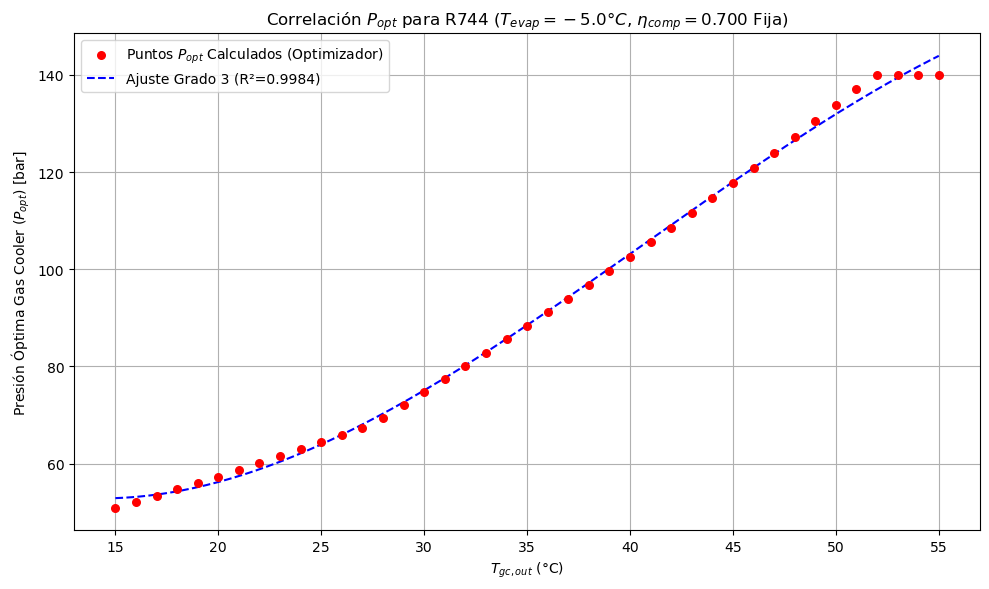


Correlación P_opt generada (Grado 3, R²=0.9984). Coeficientes: [-1.41930325e-03  1.73814372e-01 -4.10754965e+00  8.01754877e+01]

--- Iniciando Optimización de Delta T ---
T_ambient = 13.1°C
Rango Delta T a probar: De 2.0 a 15.0, Paso ~0.1°C
Objetivo: Minimizar Energía Total Consumida (kWh)
(Parada temprana activada si la energía aumenta > 0.1% respecto al mínimo)
--------------------------------------------------
Optimizando 1/131: Probando DeltaT = 2.00°C...
Optimizando 2/131: Probando DeltaT = 2.10°C...
  -> DETENIENDO BÚSQUEDA TEMPRANA: Energía actual (9.6492 kWh @ DeltaT=2.10°C) es > 0.1% mayor que la mínima encontrada (9.6270 kWh @ DeltaT=2.00°C).

Optimización de Delta T completada en 50.96 segundos.
(La búsqueda se detuvo temprano después de probar DeltaT=2.10°C)
--------------------------------------------------

--- Resultados de la Optimización de Delta T (Solo Exitosas Probadas) ---
 DeltaT  Energia(kWh)  COP_Prom  Tiempo(h)  Tgc_out(C)  Pgc(bar)
    2.0         9.627     

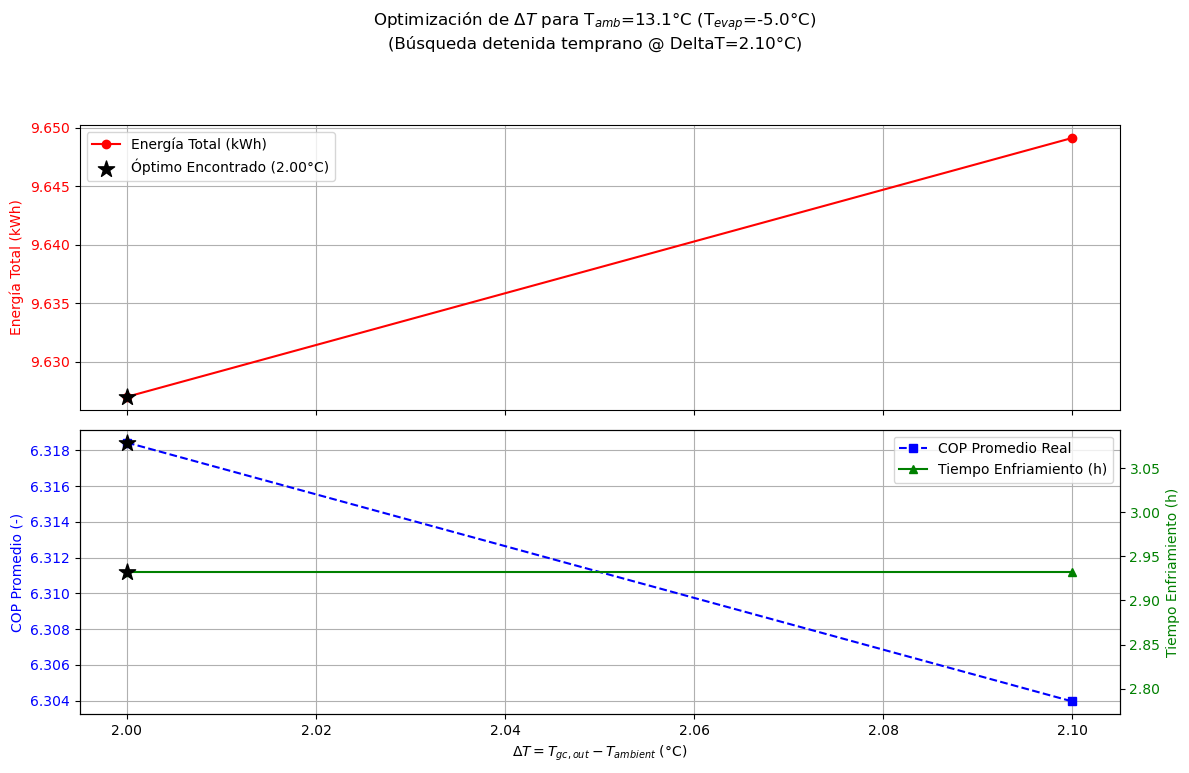


OPTIMIZACIÓN DE DELTA T COMPLETADA
El Delta T óptimo encontrado (mínima energía probada) para T_amb=13.1°C es: 2.00 °C
Resumen del caso óptimo:
delta_T_C_used               2.0
total_energy_kWh        9.627025
avg_system_COP_real     6.318435
final_time_s             10556.0
T_gc_out_C_used             15.1
P_gc_bar_used          52.896311
final_T_milk_C          3.599133
success                     True

Ejecutando simulación detallada para el caso óptimo...
(Usando dt = 1 s para simulación detallada)

Creando DataFrame detallado para el caso óptimo con 100 puntos...
(Se incluirán 100 puntos en el DataFrame)

DataFrame 'df_optimal_run_details' creado con 100 filas y 19 columnas.
Columnas: ['Tiempo (s)', 'T1(K)', 'P1(Pa)', 'h1(J/kg)', 'T2(K)', 'P2(Pa)', 'h2(J/kg)', 'T3(K)', 'P3(Pa)', 'h3(J/kg)', 'T4(K)', 'P4(Pa)', 'h4(J/kg)', 'power_comp_kW', 'T_milk_C', 'Q_del_kW', 'm_flow_kg_s', 'Q_cond_kW', 'COP']
Primeras 5 filas:
   Tiempo (s)   T1(K)        P1(Pa)     h1(J/kg)     T2(K)       P2

In [3]:
# ==============================================================================
# SECCIÓN 1: FUNCIONES DEL MODELO TERMODINÁMICO Y DEL CICLO
# ==============================================================================
# ...
def get_cp_milk(T_C, fat_percent):
    """
    Calcula la capacidad calorífica específica aparente de la leche (J/kg·K)
    basado en la temperatura (T en °C) y el porcentaje de grasa (%).
    (Se asume el código de la función ya proporcionado y validado)
    """
    cp_J_gK = None
    T = T_C
    # Polinomios para diferentes rangos de temperatura
    if 0 <= T < 10:
        cp_J_gK = (1.76658466e-05*T**5 - 4.58836819e-04*T**4 + 4.04370224e-03*T**3 - 1.30139780e-02*T**2 + 1.33604567e-02*T + 4.01576359e+00)
    elif 10 <= T < 20:
        cp_J_gK = (6.22034295e-06*T**5 - 4.39825638e-04*T**4 + 1.20323308e-02*T**3 - 1.58521777e-01*T**2 + 1.01058292e+00*T + 1.55586850e+00)
    elif 20 <= T < 30:
        cp_J_gK = (8.57989556e-06*T**5 - 1.11106869e-03*T**4 + 5.72799853e-02*T**3 - 1.46758410e+00*T**2 + 1.86524283e+01*T - 8.97892159e+01)
    elif 30 <= T < 40:
        cp_J_gK = (3.70894294e-08*T**5 - 1.22027288e-05*T**4 + 1.48337059e-03*T**3 - 8.22247585e-02*T**2 + 2.10691612e+00*T - 1.62358505e+01)
    # Añadir más rangos si es necesario, o un fallback
    elif T >= 40:
        # Usar el valor de 39.99 como aproximación o un valor constante
        T_fallback = 39.99
        cp_J_gK = (3.70894294e-08*T_fallback**5 - 1.22027288e-05*T_fallback**4 + 1.48337059e-03*T_fallback**3 - 8.22247585e-02*T_fallback**2 + 2.10691612e+00*T_fallback - 1.62358505e+01)
    else: # T < 0
        T_fallback = 0.0
        cp_J_gK = (1.76658466e-05*T_fallback**5 - 4.58836819e-04*T_fallback**4 + 4.04370224e-03*T_fallback**3 - 1.30139780e-02*T_fallback**2 + 1.33604567e-02*T_fallback + 4.01576359e+00)

    if cp_J_gK is None: return None
    # Chequeo de validez
    if cp_J_gK <= 0:
        pass
        return None
    return cp_J_gK * 1000.0 # Convertir de J/gK a J/kgK

def get_thermo_cycle_properties(T_evap_C, P_gc_Pa, T_gc_out_C, eta_comp_dynamic, superheat_K, fluid):
    """
    Calcula propiedades del ciclo termodinámico para un estado operativo dado.
    """
    fluid_backend = fluid
    try:
        T_evap_K = T_evap_C + 273.15
        T_gc_out_K = T_gc_out_C + 273.15
        T_crit_K = CP.PropsSI('Tcrit', fluid_backend)
        P_crit_Pa = CP.PropsSI('Pcrit', fluid_backend)
        T_max_fluid = CP.PropsSI('Tmax', fluid_backend)
        T_min_fluid = CP.PropsSI('Tmin', fluid_backend)
        if not (T_min_fluid < T_evap_K < T_crit_K): return None
        if not (T_min_fluid < T_gc_out_K < T_max_fluid): return None
        P1_Pa = CP.PropsSI('P', 'T', T_evap_K, 'Q', 1, fluid_backend)
        T1_K = T_evap_K + superheat_K
        if T1_K >= T_max_fluid or T1_K <= T_min_fluid: return None
        try:
            h1_J_kg = CP.PropsSI('H', 'T', T1_K, 'P', P1_Pa, fluid_backend)
            s1_J_kgK = CP.PropsSI('S', 'T', T1_K, 'P', P1_Pa, fluid_backend)
        except ValueError: return None
        P2_Pa = P_gc_Pa
        if P2_Pa <= P1_Pa * 1.001: return None
        s2s = s1_J_kgK
        try:
            h2s = CP.PropsSI('H', 'P', P2_Pa, 'S', s2s, fluid_backend)
        except ValueError: return None
        if not (0.1 < eta_comp_dynamic <= 1.0): eta_comp_dynamic = 0.7
        delta_h_comp_isentropic = h2s - h1_J_kg
        if eta_comp_dynamic <= 0: return None
        h2_J_kg = h1_J_kg + delta_h_comp_isentropic / eta_comp_dynamic
        try:
            T2_K = CP.PropsSI('T', 'P', P2_Pa, 'H', h2_J_kg, fluid_backend)
            if T2_K >= T_max_fluid or T2_K <= T_min_fluid: return None
            s2_J_kgK = CP.PropsSI('S', 'P', P2_Pa, 'H', h2_J_kg, fluid_backend)
        except ValueError: return None
        P3_Pa = P2_Pa
        T3_K = T_gc_out_K
        if T3_K >= T2_K - 0.01: return None
        try:
             h3_J_kg = CP.PropsSI('H', 'T', T3_K, 'P', P3_Pa, fluid_backend)
             s3_J_kgK = CP.PropsSI('S', 'T', T3_K, 'P', P3_Pa, fluid_backend)
        except ValueError: return None
        P4_Pa = P1_Pa
        h4_J_kg = h3_J_kg
        try:
            try:
                T4_K = CP.PropsSI('T', 'P', P4_Pa, 'H', h4_J_kg, fluid_backend)
            except ValueError:
                T4_K = T_evap_K
            if not (T_min_fluid <= T4_K <= T_max_fluid): T4_K = np.nan
            try:
                s4_J_kgK = CP.PropsSI('S', 'P', P4_Pa, 'H', h4_J_kg, fluid_backend)
            except ValueError:
                s4_J_kgK = np.nan
        except ValueError:
             return None
        delta_h_evap_J_kg = h1_J_kg - h4_J_kg
        delta_h_comp_J_kg = h2_J_kg - h1_J_kg
        delta_h_gc_J_kg = h2_J_kg - h3_J_kg
        if delta_h_evap_J_kg <= 1e-3 or delta_h_comp_J_kg <= 1e-3 or delta_h_gc_J_kg <= 1e-3:
            return None
        cycle_props = {
            'T1_K': T1_K, 'P1_Pa': P1_Pa, 'h1_J_kg': h1_J_kg, 's1_J_kgK': s1_J_kgK,
            'T2_K': T2_K, 'P2_Pa': P2_Pa, 'h2_J_kg': h2_J_kg, 's2_J_kgK': s2_J_kgK,
            'T3_K': T3_K, 'P3_Pa': P3_Pa, 'h3_J_kg': h3_J_kg, 's3_J_kgK': s3_J_kgK,
            'T4_K': T4_K, 'P4_Pa': P4_Pa, 'h4_J_kg': h4_J_kg, 's4_J_kgK': s4_J_kgK,
            'delta_h_evap_J_kg': delta_h_evap_J_kg,
            'delta_h_comp_J_kg': delta_h_comp_J_kg,
            'delta_h_gc_J_kg': delta_h_gc_J_kg,
            'eta_comp_used': eta_comp_dynamic,
            'valid': True}
        for i in [1, 2, 3, 4]:
             try:
                 pi = cycle_props[f'P{i}_Pa']
                 hi = cycle_props[f'h{i}_J_kg']
                 try:
                     Tsat_low = CP.PropsSI('T','P',pi,'Q',0,fluid_backend)
                     Tsat_high = CP.PropsSI('T','P',pi,'Q',1,fluid_backend)
                     if abs(Tsat_low - Tsat_high) < 1e-6:
                         xi = np.nan
                     else:
                         xi = CP.PropsSI('Q', 'P', pi, 'H', hi, fluid_backend)
                 except ValueError: xi = np.nan
                 cycle_props[f'x{i}'] = xi
             except (KeyError, ValueError): cycle_props[f'x{i}'] = np.nan
        return cycle_props
    except ValueError as e: return None
    except Exception as e: return None

def calculate_cop(cycle_props):
    """ Calcula el COP a partir del diccionario de propiedades del ciclo. """
    if not cycle_props or not cycle_props.get('valid', False): return None
    delta_h_evap = cycle_props.get('delta_h_evap_J_kg', 0)
    delta_h_comp = cycle_props.get('delta_h_comp_J_kg', 0)
    if delta_h_comp > 1e-3:
        cop = delta_h_evap / delta_h_comp
        return cop if (0.1 < cop < 15) else None
    else:
        return None
    
# ==============================================================================
# SECCIÓN 2: GENERACIÓN DE CORRELACIÓN P_opt = f(T_gc_out)
# ==============================================================================
# ...
def objective_neg_cop(P_gc_Pa, T_evap_C, T_gc_out_C, eta_comp_fixed, superheat_K, fluid):
    """Calcula el negativo del COP para una P_gc dada. Se usa para maximizar COP."""
    cycle_props = get_thermo_cycle_properties(
        T_evap_C, P_gc_Pa, T_gc_out_C, eta_comp_fixed, superheat_K, fluid
    )
    cop = calculate_cop(cycle_props)
    if cop is None:
        return np.inf # Penalizar fuertemente si el ciclo/COP es inválido
    else:
        return -cop # Minimizar el negativo es maximizar el positivo

def find_optimal_pressure_optimized(T_evap_C, T_gc_out_C, eta_comp_fixed, superheat_K, fluid,
                                    P_gc_min_Pa, P_gc_max_Pa, P_min_req_Pa):
    """
    Encuentra P_gc (Pa) que maximiza COP usando scipy.optimize.minimize_scalar.
    Respeta P_min_req_Pa. Usa eficiencia de compresor FIJA (eta_comp_fixed).
    """
    bracket_min = max(P_gc_min_Pa, P_min_req_Pa)
    bracket_max = P_gc_max_Pa
    if bracket_min >= bracket_max:
        props_at_min = get_thermo_cycle_properties(T_evap_C, bracket_min, T_gc_out_C, eta_comp_fixed, superheat_K, fluid)
        cop_at_min = calculate_cop(props_at_min)
        if cop_at_min is not None:
             return bracket_min, cop_at_min
        else:
             return None, None
    try:
        opt_result = minimize_scalar(
            objective_neg_cop,
            args=(T_evap_C, T_gc_out_C, eta_comp_fixed, superheat_K, fluid),
            bounds=(bracket_min, bracket_max),
            method='bounded',
            options={'xatol': 1e4} )
        if opt_result.success:
            optimal_P_gc_Pa = opt_result.x
            max_cop = -opt_result.fun
            if max_cop is None or max_cop == -np.inf or max_cop <= 0:
                props_at_min = get_thermo_cycle_properties(T_evap_C, bracket_min, T_gc_out_C, eta_comp_fixed, superheat_K, fluid)
                cop_at_min = calculate_cop(props_at_min)
                props_at_max = get_thermo_cycle_properties(T_evap_C, bracket_max, T_gc_out_C, eta_comp_fixed, superheat_K, fluid)
                cop_at_max = calculate_cop(props_at_max)
                if cop_at_min is not None and (cop_at_max is None or cop_at_min >= cop_at_max):
                    return bracket_min, cop_at_min
                elif cop_at_max is not None:
                    return bracket_max, cop_at_max
                else:
                    return None, None
            return optimal_P_gc_Pa, max_cop
        else:
            props_at_min = get_thermo_cycle_properties(T_evap_C, bracket_min, T_gc_out_C, eta_comp_fixed, superheat_K, fluid)
            cop_at_min = calculate_cop(props_at_min)
            props_at_max = get_thermo_cycle_properties(T_evap_C, bracket_max, T_gc_out_C, eta_comp_fixed, superheat_K, fluid)
            cop_at_max = calculate_cop(props_at_max)
            if cop_at_min is not None and (cop_at_max is None or cop_at_min >= cop_at_max):
                return bracket_min, cop_at_min
            elif cop_at_max is not None:
                return bracket_max, cop_at_max
            else:
                return None, None
    except Exception as e:
        return None, None

def generate_p_opt_correlation(T_evap_C, eta_comp_fixed, superheat_K, fluid,
                               T_gc_out_min_C=15.0, T_gc_out_max_C=55.0, T_gc_out_step_C=1.0,
                               P_gc_min_bar=45.0, P_gc_max_bar=140.0,
                               poly_degree=2, plot_correlation=True):
    """
    Genera y ajusta correlación P_opt = f(T_gc_out) usando optimización, devuelve coeficientes.
    """
    T_gc_out_range_C = np.arange(T_gc_out_min_C, T_gc_out_max_C + T_gc_out_step_C / 2, T_gc_out_step_C)
    P_gc_search_min_Pa = P_gc_min_bar * 1e5
    P_gc_search_max_Pa = P_gc_max_bar * 1e5
    P_min_req_Pa = P_gc_min_bar * 1e5
    try:
        P_evap_approx_Pa = CP.PropsSI('P', 'T', T_evap_C + 273.15, 'Q', 1, fluid)
        P_min_req_Pa = max(P_gc_min_bar * 1e5, P_evap_approx_Pa + 5e5)
        P_gc_search_min_Pa = max(P_gc_search_min_Pa, P_min_req_Pa)
    except ValueError:
        warnings.warn(f"No se pudo calcular P_evap para T_evap={T_evap_C}°C. Usando P_min_req={P_min_req_Pa/1e5:.1f} bar.")

    print(f"\n--- Generando Correlación P_opt = f(T_gc_out) (Optimizado) ---")
    print(f"Parámetros Fijos: T_evap={T_evap_C}°C, η_comp={eta_comp_fixed:.3f} (Fija), SH={superheat_K}K, Fluido={fluid}")
    print(f"Rango T_gc_out: [{T_gc_out_min_C}°C - {T_gc_out_max_C}°C], Paso: {T_gc_out_step_C}°C")
    print(f"Presión Mínima Requerida (Operativa): {P_min_req_Pa/1e5:.1f} bar")
    print("-" * 50)
    optimal_data = {'T_gc_out_C': [], 'P_opt_bar': [], 'Max_COP': []}
    start_time = time.time()
    for i, T_gc_out_test_C in enumerate(T_gc_out_range_C):
        P_opt_Pa, max_cop = find_optimal_pressure_optimized(
             T_evap_C, T_gc_out_test_C, eta_comp_fixed, superheat_K, fluid,
             P_gc_search_min_Pa, P_gc_search_max_Pa, P_min_req_Pa )
        if P_opt_Pa is not None and max_cop is not None:
            optimal_data['P_opt_bar'].append(P_opt_Pa / 1e5)
            optimal_data['T_gc_out_C'].append(T_gc_out_test_C)
            optimal_data['Max_COP'].append(max_cop)
            if (i + 1) % max(1, len(T_gc_out_range_C)//10) == 0 or i == 0 or i == len(T_gc_out_range_C) - 1:
                 elapsed = time.time() - start_time
                 print(f"  Progreso: {i+1}/{len(T_gc_out_range_C)} | T_gc={T_gc_out_test_C:5.1f}°C -> P_opt={P_opt_Pa/1e5:6.2f} bar (COP={max_cop:.3f}) | {elapsed:.1f}s")
        else:
            print(f"  Progreso: {i+1}/{len(T_gc_out_range_C)} | T_gc={T_gc_out_test_C:5.1f}°C -> No se encontró óptimo válido.")
    elapsed = time.time() - start_time
    print(f"Cálculo P_opt (optimizado) completado en {elapsed:.2f} segundos.")
    print("-" * 50)
    df_results = pd.DataFrame(optimal_data)
    if len(df_results) < poly_degree + 1:
        print(f"Error: Insuficientes puntos válidos ({len(df_results)}) para ajuste de grado {poly_degree}.")
        return None, None, df_results
    T_data = df_results['T_gc_out_C'].values
    P_data = df_results['P_opt_bar'].values
    try:
        coeffs = np.polyfit(T_data, P_data, poly_degree)
        poly_func = np.poly1d(coeffs)
        P_fit = poly_func(T_data)
        ss_res = np.sum((P_data - P_fit)**2); ss_tot = np.sum((P_data - np.mean(P_data))**2)
        r_squared = 1 - (ss_res / ss_tot) if ss_tot > 1e-9 else 1.0
    except (np.linalg.LinAlgError, ValueError) as e:
         print(f"Error durante el ajuste polinómico: {e}")
         return None, None, df_results
    print("\n--- Resultados del Ajuste Polinómico ---")
    print(f"Grado: {poly_degree}, Coeficientes (mayor grado primero): {coeffs}")
    terms = []
    for i, c in enumerate(coeffs):
        power = poly_degree - i
        if abs(c) > 1e-12:
             term = f"{c:+.4e}"
             if power > 0: term += f"*T"
             if power > 1: term += f"^{power}"
             terms.append(term)
    equation = "P_opt [bar] = " + " ".join(terms)
    print(f"Ecuación: {equation}")
    print(f"R²: {r_squared:.6f}")
    if plot_correlation:
        plt.figure("Correlacion P_opt vs T_gc_out", figsize=(10, 6))
        plt.scatter(T_data, P_data, label='Puntos $P_{{opt}}$ Calculados (Optimizador)', color='red', s=30, zorder=5)
        T_smooth = np.linspace(T_data.min(), T_data.max(), 200)
        plt.plot(T_smooth, poly_func(T_smooth), label=f'Ajuste Grado {poly_degree} (R²={r_squared:.4f})', color='blue', linestyle='--')
        plt.xlabel('$T_{gc,out}$ (°C)')
        plt.ylabel('Presión Óptima Gas Cooler ($P_{{opt}}$) [bar]')
        plt.title(f'Correlación $P_{{opt}}$ para {fluid} ($T_{{evap}}={T_evap_C}°C$, $\eta_{{comp}}={eta_comp_fixed:.3f}$ Fija)')
        plt.legend(); plt.grid(True); plt.tight_layout(); plt.show(block=False)
    return coeffs, r_squared, df_results

# ==============================================================================
# SECCIÓN 3: SIMULACIÓN DINÁMICA 
# ==============================================================================
# ...
def run_dynamic_cooling_simulation(
    # Parámetros que cambian en la optimización de DeltaT:
    delta_T_C, T_ambient_C,
    # Parámetros fijos de control y sistema:
    T_evap_C_target, p_opt_coeffs, P_min_req_Pa, eta_comp_nominal, superheat_K, fluid,
    min_speed_ratio, max_speed_ratio, eta_loss_factor,
    # Propiedades de la leche y simulación:
    milk_props, sim_settings,
    # Otros:
    num_output_points=100, verbose=False, return_detailed_arrays=False):
    """
    Ejecuta simulación dinámica usando T_gc_out = T_ambient + delta_T
    y P_gc = P_opt(T_gc_out) calculado con coeffs, respetando P_min_req_Pa.
    Si return_detailed_arrays es True, devuelve arrays muestreados Y COMPLETOS.
    """
    if verbose: print(f"\n--- Iniciando Simulación Dinámica para DeltaT = {delta_T_C:.2f}°C ---")
    T_gc_out_C = T_ambient_C + delta_T_C
    T_gc_out_K = T_gc_out_C + 273.15
    poly_p_opt = np.poly1d(p_opt_coeffs)
    P_gc_target_Pa = poly_p_opt(T_gc_out_C) * 1e5
    P_gc_Pa_sim = max(P_gc_target_Pa, P_min_req_Pa)
    T_evap_K_target = T_evap_C_target + 273.15
    m_milk = milk_props['m_milk']
    fat_percent = milk_props['fat_percent']
    cp_milk_avg_fallback = milk_props['cp_milk_avg']
    T_milk_initial_K = milk_props['T_milk_initial_K']
    T_milk_final_K = milk_props['T_milk_final_K']
    UA_eff = sim_settings['UA_eff']
    dt = sim_settings['dt']
    max_sim_time_s = sim_settings['max_sim_time_s']
    if verbose:
        print(f"Condiciones Sim: T_ambient={T_ambient_C}°C, DeltaT={delta_T_C}°C => T_gc_out={T_gc_out_C:.2f}°C")
        print(f"                     P_opt(T_gc_out)={P_gc_target_Pa/1e5:.2f} bar => P_gc_usada={P_gc_Pa_sim/1e5:.2f} bar (MinReq={P_min_req_Pa/1e5:.1f} bar)")
        print(f"                     T_evap_target={T_evap_C_target}°C, dt={dt} s")

    initial_eta_comp = eta_comp_nominal
    initial_cycle_props = get_thermo_cycle_properties(T_evap_C_target, P_gc_Pa_sim, T_gc_out_C,
                                                      initial_eta_comp, superheat_K, fluid)
    if initial_cycle_props is None:
        if verbose: print(f"Error: Ciclo termodinámico inicial inválido para DeltaT={delta_T_C:.1f}")
        fail_reason = {'success': False, 'reason': 'Ciclo inicial inválido',
                           'delta_T_C_used': delta_T_C, 'T_gc_out_C_used': T_gc_out_C,
                           'P_gc_Pa_used': P_gc_Pa_sim}
        return fail_reason
    delta_h_evap_nominal = initial_cycle_props['delta_h_evap_J_kg']
    delta_h_comp_nominal = initial_cycle_props['delta_h_comp_J_kg']
    delta_h_gc_nominal = initial_cycle_props['delta_h_gc_J_kg']
    Q_evap_initial = UA_eff * (T_milk_initial_K - T_evap_K_target)
    if Q_evap_initial <= 0:
        if verbose: print(f"Error: Carga térmica inicial no positiva (Q={Q_evap_initial:.2f}) para DeltaT={delta_T_C:.1f}")
        return {'success': False, 'reason': 'Carga inicial no positiva',
                'delta_T_C_used': delta_T_C, 'T_gc_out_C_used': T_gc_out_C,
                'P_gc_Pa_used': P_gc_Pa_sim}
    if delta_h_evap_nominal <= 1e-3:
        if verbose: print(f"Error: delta_h_evap nominal inválido ({delta_h_evap_nominal})")
        return {'success': False, 'reason': 'delta_h_evap nominal inválido',
                'delta_T_C_used': delta_T_C}
    m_flow_nominal = Q_evap_initial / delta_h_evap_nominal
    if m_flow_nominal <= 0 :
        if verbose: print(f"Error: Flujo másico nominal inicial no positivo (m_flow={m_flow_nominal:.4f})")
        return {'success': False, 'reason': 'Flujo nominal inicial no positivo',
                'delta_T_C_used': delta_T_C, 'T_gc_out_C_used': T_gc_out_C,
                'P_gc_Pa_used': P_gc_Pa_sim}

    time_data_full = [0.0]
    T_milk_data_K_full = [T_milk_initial_K]
    cp_milk_data_full = []
    Q_req_data_W_full = [Q_evap_initial]
    Q_del_data_W_full = [Q_evap_initial]
    m_flow_data_full = [m_flow_nominal * max_speed_ratio]
    speed_ratio_data_full = [max_speed_ratio]
    eta_comp_data_full = [initial_eta_comp]
    power_comp_data_W_full = []
    Q_gc_data_W_full = []
    inst_cop_data_full = []
    delta_h_evap_full = []
    delta_h_comp_full = []
    delta_h_gc_full = []
    cycle_thermo_data_full = {}
    if return_detailed_arrays:
        for i in range(1, 5):
            cycle_thermo_data_full[f'T{i}_K'] = []
            cycle_thermo_data_full[f'P{i}_Pa'] = []
            cycle_thermo_data_full[f'h{i}_J_kg'] = []

    initial_T_C = T_milk_initial_K - 273.15
    initial_cp = get_cp_milk(initial_T_C, fat_percent)
    cp_milk_data_full.append(initial_cp if initial_cp is not None else cp_milk_avg_fallback)
    initial_m_flow = m_flow_data_full[0]
    initial_power = initial_m_flow * delta_h_comp_nominal
    initial_Q_gc = initial_m_flow * delta_h_gc_nominal
    power_comp_data_W_full.append(initial_power)
    Q_gc_data_W_full.append(initial_Q_gc)
    initial_cop = Q_evap_initial / initial_power if initial_power > 1e-6 else np.nan
    inst_cop_data_full.append(initial_cop)
    delta_h_evap_full.append(delta_h_evap_nominal)
    delta_h_comp_full.append(delta_h_comp_nominal)
    delta_h_gc_full.append(delta_h_gc_nominal)
    if return_detailed_arrays:
        for i in range(1, 5):
            cycle_thermo_data_full[f'T{i}_K'].append(initial_cycle_props.get(f'T{i}_K', np.nan))
            cycle_thermo_data_full[f'P{i}_Pa'].append(initial_cycle_props.get(f'P{i}_Pa', np.nan))
            cycle_thermo_data_full[f'h{i}_J_kg'].append(initial_cycle_props.get(f'h{i}_J_kg', np.nan))

    current_T_milk_K = T_milk_initial_K
    current_t_s = 0.0
    total_energy_J = 0.0
    simulation_success = False
    warned_about_cp = False
    step_count = 0
    fail_reason_str = ""

    while current_t_s < max_sim_time_s:
        if current_T_milk_K <= T_milk_final_K + 0.1:
            simulation_success = True; break
        delta_T_evap = current_T_milk_K - T_evap_K_target
        Q_evap_required = UA_eff * delta_T_evap if delta_T_evap > 0.1 else 0.0
        m_flow_required = Q_evap_required / delta_h_evap_nominal if delta_h_evap_nominal > 1e-3 else 0
        speed_ratio = m_flow_required / m_flow_nominal if m_flow_nominal > 1e-9 else 0
        speed_ratio = np.clip(speed_ratio, min_speed_ratio, max_speed_ratio)
        current_m_flow = m_flow_nominal * speed_ratio
        eta_comp_dynamic = eta_comp_nominal * (1.0 - eta_loss_factor * (1.0 - speed_ratio))
        eta_comp_dynamic = np.clip(eta_comp_dynamic, 0.1, 1.0)
        current_cycle_props = get_thermo_cycle_properties(T_evap_C_target, P_gc_Pa_sim, T_gc_out_C,
                                                          eta_comp_dynamic, superheat_K, fluid)
        if current_cycle_props is None:
            fail_reason_str = f'Fallo recálculo ciclo @ t={current_t_s:.1f}s'; simulation_success = False; break
        delta_h_evap_actual = current_cycle_props.get('delta_h_evap_J_kg')
        delta_h_comp_actual = current_cycle_props.get('delta_h_comp_J_kg')
        delta_h_gc_actual = current_cycle_props.get('delta_h_gc_J_kg')
        if delta_h_evap_actual is None or delta_h_comp_actual is None or delta_h_gc_actual is None or \
           delta_h_evap_actual <= 0 or delta_h_comp_actual <= 0 or delta_h_gc_actual <= 0:
            fail_reason_str = f'Delta H inválido @ t={current_t_s:.1f}s'; simulation_success = False; break
        Q_evap_delivered = current_m_flow * delta_h_evap_actual
        current_power_comp_W = current_m_flow * delta_h_comp_actual
        current_Q_gc_W = current_m_flow * delta_h_gc_actual
        current_T_milk_C = current_T_milk_K - 273.15
        cp_milk_dynamic = get_cp_milk(current_T_milk_C, fat_percent)
        if cp_milk_dynamic is None:
            if not warned_about_cp: warned_about_cp = True
            cp_milk_dynamic = cp_milk_avg_fallback
        if cp_milk_dynamic <= 1e-3 or m_milk <= 1e-6:
            fail_reason_str = f'Cp o masa inválidos.'; simulation_success = False; break
        delta_T_milk = - (Q_evap_delivered * dt) / (m_milk * cp_milk_dynamic)
        if delta_T_milk >= -1e-9:
             if abs(current_T_milk_K - T_milk_final_K) > 0.5:
                 fail_reason_str = f'Enfriamiento inefectivo @ t={current_t_s:.1f}s'

        next_t_s = current_t_s + dt
        next_T_milk_K = current_T_milk_K + delta_T_milk
        total_energy_J += current_power_comp_W * dt

        time_data_full.append(next_t_s)
        T_milk_data_K_full.append(next_T_milk_K)
        power_comp_data_W_full.append(current_power_comp_W)
        Q_req_data_W_full.append(Q_evap_required)
        Q_del_data_W_full.append(Q_evap_delivered)
        Q_gc_data_W_full.append(current_Q_gc_W)
        m_flow_data_full.append(current_m_flow)
        speed_ratio_data_full.append(speed_ratio)
        eta_comp_data_full.append(eta_comp_dynamic)
        cp_milk_data_full.append(cp_milk_dynamic)
        inst_cop = Q_evap_delivered / current_power_comp_W if current_power_comp_W > 1e-6 else np.nan
        inst_cop_data_full.append(inst_cop)
        delta_h_evap_full.append(delta_h_evap_actual)
        delta_h_comp_full.append(delta_h_comp_actual)
        delta_h_gc_full.append(delta_h_gc_actual)
        if return_detailed_arrays:
            for i in range(1, 5):
                cycle_thermo_data_full[f'T{i}_K'].append(current_cycle_props.get(f'T{i}_K', np.nan))
                cycle_thermo_data_full[f'P{i}_Pa'].append(current_cycle_props.get(f'P{i}_Pa', np.nan))
                cycle_thermo_data_full[f'h{i}_J_kg'].append(current_cycle_props.get(f'h{i}_J_kg', np.nan))

        current_t_s = next_t_s
        current_T_milk_K = next_T_milk_K
        step_count += 1

    final_time_s = time_data_full[-1] if time_data_full else 0
    final_T_milk_K = T_milk_data_K_full[-1] if T_milk_data_K_full else T_milk_initial_K
    sim_success_flag = simulation_success and abs(final_T_milk_K - T_milk_final_K) < 0.5
    if not sim_success_flag and not fail_reason_str:
        if final_time_s >= max_sim_time_s - dt/2: fail_reason_str = 'Tiempo máximo excedido'
        else: fail_reason_str = f'No alcanzó T final ({final_T_milk_K-273.15:.1f}°C)'
    if not sim_success_flag and verbose: print(f"Advertencia: Simulación NO exitosa. Razón: {fail_reason_str}")

    total_energy_kWh = total_energy_J / 3.6e6
    Q_total_delivered_J = np.trapz(y=np.array(Q_del_data_W_full), x=np.array(time_data_full)) if len(time_data_full) > 1 else 0
    avg_system_COP_real = Q_total_delivered_J / total_energy_J if total_energy_J > 1e-6 else np.nan

    results = {
        'success': sim_success_flag,'reason': fail_reason_str if not sim_success_flag else 'OK',
        'delta_T_C_used': delta_T_C,'T_ambient_C': T_ambient_C,'T_evap_C_target': T_evap_C_target,
        'T_gc_out_C_used': T_gc_out_C,'P_gc_Pa_used': P_gc_Pa_sim,'final_time_s': final_time_s,
        'total_energy_kWh': total_energy_kWh if sim_success_flag else np.nan,
        'final_T_milk_C': final_T_milk_K - 273.15,
        'avg_system_COP_real': avg_system_COP_real if sim_success_flag else np.nan,
        'num_steps': step_count,
        'time_s_full': time_data_full, 'T_milk_C_full': list(np.array(T_milk_data_K_full) - 273.15),
        'cp_milk_full': cp_milk_data_full, 'Q_req_kW_full': list(np.array(Q_req_data_W_full) / 1000.0),
        'Q_del_kW_full': list(np.array(Q_del_data_W_full) / 1000.0),
        'Q_gc_kW_full': list(np.array(Q_gc_data_W_full) / 1000.0),
        'm_flow_kg_s_full': m_flow_data_full, 'speed_ratio_full': speed_ratio_data_full,
        'eta_comp_full': eta_comp_data_full, 'power_comp_kW_full': list(np.array(power_comp_data_W_full) / 1000.0),
        'inst_COP_full': inst_cop_data_full, 'delta_h_evap_full': delta_h_evap_full,
        'delta_h_comp_full': delta_h_comp_full, 'delta_h_gc_full': delta_h_gc_full,
    }

    if return_detailed_arrays:
        results['detailed_data_available'] = False
        for i in range(1, 5):
            results[f'T{i}_K_full'] = cycle_thermo_data_full.get(f'T{i}_K', [])
            results[f'P{i}_Pa_full'] = cycle_thermo_data_full.get(f'P{i}_Pa', [])
            results[f'h{i}_J_kg_full'] = cycle_thermo_data_full.get(f'h{i}_J_kg', [])
        n_steps = len(time_data_full)
        if n_steps > 1:
            num_points_to_sample = min(n_steps, num_output_points)
            indices_sampled = np.round(np.linspace(0, n_steps - 1, num=num_points_to_sample)).astype(int)
            indices_sampled = np.unique(indices_sampled)
            def sample_array(data_list):
                arr = np.array(data_list)
                current_len = len(arr)
                if current_len == n_steps:
                    valid_indices = indices_sampled[indices_sampled < current_len]
                    sampled_values = np.full(len(indices_sampled), np.nan)
                    if len(valid_indices) > 0: sampled_values[indices_sampled < current_len] = arr[valid_indices]
                    return sampled_values
                elif current_len == n_steps - 1:
                     arr_padded = np.insert(arr.astype(float), 0, np.nan)
                     valid_indices = indices_sampled[indices_sampled < len(arr_padded)]
                     sampled_values = np.full(len(indices_sampled), np.nan)
                     if len(valid_indices) > 0: sampled_values[indices_sampled < len(arr_padded)] = arr_padded[valid_indices]
                     return sampled_values
                else: return np.full(len(indices_sampled), np.nan)

            results['num_original_steps'] = n_steps
            results['num_sampled_points'] = len(indices_sampled)
            results['time_s_series'] = sample_array(results['time_s_full'])
            results['T_milk_C_series'] = sample_array(results['T_milk_C_full'])
            results['cp_milk_series'] = sample_array(results['cp_milk_full'])
            results['Q_req_kW_series'] = sample_array(results['Q_req_kW_full'])
            results['Q_del_kW_series'] = sample_array(results['Q_del_kW_full'])
            results['Q_gc_kW_series'] = sample_array(results['Q_gc_kW_full'])
            results['m_flow_kg_s_series'] = sample_array(results['m_flow_kg_s_full'])
            results['speed_ratio_series'] = sample_array(results['speed_ratio_full'])
            results['eta_comp_series'] = sample_array(results['eta_comp_full'])
            results['power_comp_kW_series'] = sample_array(results['power_comp_kW_full'])
            results['inst_COP_series'] = sample_array(results['inst_COP_full'])
            for i in range(1, 5):
                results[f'T{i}_K_series'] = sample_array(results.get(f'T{i}_K_full', []))
                results[f'P{i}_Pa_series'] = sample_array(results.get(f'P{i}_Pa_full', []))
                results[f'h{i}_Jkg_series'] = sample_array(results.get(f'h{i}_J_kg_full', []))
            results['detailed_data_available'] = True
        else:
            if verbose: print("Advertencia: No se generaron suficientes pasos para muestreo detallado.")
    if verbose: print(f"Sim Fin: DeltaT={delta_T_C:.1f}°C, Tiempo={final_time_s/3600:.2f}h, Energía={results['total_energy_kWh'] if results['success'] else np.nan:.3f}kWh, COP Prom={results['avg_system_COP_real'] if results['success'] else np.nan:.3f}, Éxito={results['success']}")
    return results

# ==============================================================================
# SECCIÓN 4: OPTIMIZACIÓN DE DELTA_T 
# ==============================================================================

def optimize_delta_T(
    # Parametros a variar / optimizar:
    delta_T_range_C, T_ambient_C,
    # Parametros fijos de control y sistema (incluyendo coeffs de P_opt):
    T_evap_C_target, p_opt_coeffs, P_min_req_Pa, eta_comp_nominal, superheat_K, fluid,
    min_speed_ratio, max_speed_ratio, eta_loss_factor,
    # Propiedades de la leche y simulación:
    milk_props, sim_settings,
    # Otros:
    early_stop_threshold_percent=5.0, # <<< NUEVO: % de aumento de energía para detenerse
    verbose_optimization=True, verbose_simulation=False):
    """
    Ejecuta simulaciones para un rango de delta_T y encuentra el óptimo
    que minimiza la energía total consumida. Implementa parada temprana.
    """
    print(f"\n--- Iniciando Optimización de Delta T ---")
    print(f"T_ambient = {T_ambient_C}°C")
    print(f"Rango Delta T a probar: De {min(delta_T_range_C):.1f} a {max(delta_T_range_C):.1f}, Paso ~{np.diff(delta_T_range_C)[0] if len(delta_T_range_C)>1 else 0:.1f}°C")
    print(f"Objetivo: Minimizar Energía Total Consumida (kWh)")
    if early_stop_threshold_percent is not None and early_stop_threshold_percent > 0:
        print(f"(Parada temprana activada si la energía aumenta > {early_stop_threshold_percent:.1f}% respecto al mínimo)")
    else:
        print("(Parada temprana desactivada)")
    print("-" * 50)

    results_optimization = []
    start_time_opt = time.time()

    # Variables para parada temprana
    best_energy_kwh = np.inf
    best_delta_T_so_far = None
    stopped_early = False
    found_at_least_one_success = False
    last_delta_T_tested = None # Para mensaje final si se detiene temprano

    for i, delta_T_test_C in enumerate(delta_T_range_C):
        if verbose_optimization:
            print(f"Optimizando {i+1}/{len(delta_T_range_C)}: Probando DeltaT = {delta_T_test_C:.2f}°C...")

        # Ejecutar la simulación dinámica para este delta_T
        sim_results = run_dynamic_cooling_simulation(
            delta_T_C=delta_T_test_C,
            T_ambient_C=T_ambient_C,
            # Pasar el resto de parámetros fijos:
            T_evap_C_target=T_evap_C_target,
            p_opt_coeffs=p_opt_coeffs,
            P_min_req_Pa=P_min_req_Pa,
            eta_comp_nominal=eta_comp_nominal,
            superheat_K=superheat_K,
            fluid=fluid,
            min_speed_ratio=min_speed_ratio,
            max_speed_ratio=max_speed_ratio,
            eta_loss_factor=eta_loss_factor,
            milk_props=milk_props,
            sim_settings=sim_settings,
            verbose=verbose_simulation, # Controlar verbosidad de CADA simulación
            return_detailed_arrays=False # No necesitamos detalle completo aquí
        )

        results_optimization.append(sim_results) # Guardar resultado siempre
        last_delta_T_tested = delta_T_test_C # Actualizar el último probado

        # --- Lógica de Parada Temprana ---
        if sim_results.get('success', False):
            current_energy = sim_results.get('total_energy_kWh')

            if current_energy is not None and np.isfinite(current_energy):
                found_at_least_one_success = True
                # Comprobar si es el mejor hasta ahora
                if current_energy < best_energy_kwh:
                    best_energy_kwh = current_energy
                    best_delta_T_so_far = delta_T_test_C
                # Si no es el mejor, y ya hemos encontrado un mínimo antes
                elif best_energy_kwh != np.inf:
                    # Comprobar si el aumento supera el umbral
                    if early_stop_threshold_percent is not None and early_stop_threshold_percent > 0:
                         increase_threshold_value = best_energy_kwh * (1.0 + early_stop_threshold_percent / 100.0)
                         if current_energy > increase_threshold_value:
                             if verbose_optimization:
                                 print(f"  -> DETENIENDO BÚSQUEDA TEMPRANA: "
                                       f"Energía actual ({current_energy:.4f} kWh @ DeltaT={delta_T_test_C:.2f}°C) "
                                       f"es > {early_stop_threshold_percent:.1f}% mayor que la mínima encontrada "
                                       f"({best_energy_kwh:.4f} kWh @ DeltaT={best_delta_T_so_far:.2f}°C).")
                             stopped_early = True
                             break 

    elapsed_opt = time.time() - start_time_opt
    print(f"\nOptimización de Delta T completada en {elapsed_opt:.2f} segundos.")
    if stopped_early and last_delta_T_tested is not None:
        print(f"(La búsqueda se detuvo temprano después de probar DeltaT={last_delta_T_tested:.2f}°C)")
    elif not found_at_least_one_success:
         print("(Advertencia: No se encontró ninguna simulación exitosa durante la optimización)")
    print("-" * 50)

    # --- Analizar Resultados de Optimización ---
    if not results_optimization: # Si la lista está vacía
         print("¡Error! No se ejecutaron simulaciones.")
         return None, pd.DataFrame() # Devolver None y un DataFrame vacío

    df_opt_results = pd.DataFrame(results_optimization)

    # Filtrar simulaciones no exitosas (donde no se alcanzó T_final razonablemente o hubo error)
    df_successful = df_opt_results[df_opt_results['success'] == True].copy()

    if df_successful.empty:
        print("¡Error! Ninguna simulación fue exitosa para el rango de Delta T probado.")
        # (Código de impresión de df_opt_results sin cambios)
        pd.options.display.width = 150
        print(df_opt_results.round(3).to_string())
        pd.reset_option('display.width')
        return None, df_opt_results

    # Encontrar el Delta T óptimo basado en el mínimo de energía DENTRO DE LOS RESULTADOS OBTENIDOS
    if df_successful['total_energy_kWh'].isnull().all():
       print("¡Error! Todas las simulaciones exitosas tienen energía NaN.")
       return None, df_opt_results

    try:
        # idxmin encontrará el índice del mínimo en la columna 'total_energy_kWh' de df_successful
        min_energy_idx = df_successful['total_energy_kWh'].idxmin()
        # Obtener la fila completa (como diccionario) correspondiente a ese mínimo
        optimal_result = df_successful.loc[min_energy_idx].to_dict()
    except ValueError:
        print("¡Error! No se pudo encontrar el mínimo de energía (posiblemente todos NaN o vacío después de filtrar).")
        return None, df_opt_results


    print("\n--- Resultados de la Optimización de Delta T (Solo Exitosas Probadas) ---")
    df_successful_sorted = df_successful.sort_values(by='total_energy_kWh')
    # (Código de formateo y visualización de df_display_final sin cambios)
    cols_to_show = ['delta_T_C_used', 'total_energy_kWh', 'avg_system_COP_real', 'final_time_s', 'T_gc_out_C_used', 'P_gc_Pa_used']
    df_display = df_successful_sorted[cols_to_show].copy()
    df_display['P_gc_bar_used'] = df_display['P_gc_Pa_used'] / 1e5
    df_display['final_time_h'] = df_display['final_time_s'] / 3600.0
    df_display.rename(columns={'delta_T_C_used':'DeltaT', 'total_energy_kWh':'Energia(kWh)',
                               'avg_system_COP_real':'COP_Prom', 'final_time_h':'Tiempo(h)',
                               'T_gc_out_C_used':'Tgc_out(C)', 'P_gc_bar_used':'Pgc(bar)'}, inplace=True)
    df_display_final = df_display[['DeltaT', 'Energia(kWh)', 'COP_Prom', 'Tiempo(h)', 'Tgc_out(C)', 'Pgc(bar)']].round(3)
    print(df_display_final.to_string(index=False))


    optimal_delta_T = optimal_result['delta_T_C_used'] # El óptimo encontrado entre los probados
    print(f"\n--- Óptimo Encontrado (entre los Delta T probados) ---")
    print(f"Delta T Óptimo (min kWh): {optimal_delta_T:.2f} °C")
    print(f"  Energía Total: {optimal_result['total_energy_kWh']:.4f} kWh")
    print(f"  COP Promedio Real: {optimal_result['avg_system_COP_real']:.4f}")
    print(f"  Tiempo Enfriamiento: {optimal_result['final_time_s']/3600.0:.3f} h")
    print(f"  Condiciones Óptimas Usadas: T_gc_out={optimal_result['T_gc_out_C_used']:.2f}°C, P_gc={optimal_result['P_gc_Pa_used']/1e5:.2f} bar")

    # --- Graficar Resultados de Optimización (Solo puntos exitosos probados) ---
    try:
        plt.figure("Optimizacion Delta T", figsize=(12, 8))
        title_suffix_opt = f' para T$_{{amb}}$={T_ambient_C}°C (T$_{{evap}}$={T_evap_C_target}°C)'
        if stopped_early:
             title_suffix_opt += f'\n(Búsqueda detenida temprano @ DeltaT={last_delta_T_tested:.2f}°C)'
        plt.suptitle(f'Optimización de $\Delta T${title_suffix_opt}', y=0.99)


        # Eje 1: Energía vs Delta T
        ax1 = plt.subplot(2, 1, 1)
        # Graficar todos los puntos exitosos que se calcularon
        ax1.plot(df_successful['delta_T_C_used'], df_successful['total_energy_kWh'], 'o-', color='red', label='Energía Total (kWh)')
        # Resaltar el mínimo encontrado entre esos puntos
        ax1.scatter([optimal_delta_T], [optimal_result['total_energy_kWh']], marker='*', color='black', s=150, zorder=5, label=f'Óptimo Encontrado ({optimal_delta_T:.2f}°C)')
        ax1.set_ylabel('Energía Total (kWh)', color='red')
        ax1.tick_params(axis='y', labelcolor='red')
        ax1.grid(True)
        ax1.legend(loc='best')
        plt.setp(ax1.get_xticklabels(), visible=False)

        # Segunda subgráfica para COP y Tiempo
        ax3 = plt.subplot(2, 1, 2, sharex=ax1) # Compartir eje X
        line3a, = ax3.plot(df_successful['delta_T_C_used'], df_successful['avg_system_COP_real'], 's--', color='blue', label='COP Promedio Real')
        ax3.scatter([optimal_delta_T], [optimal_result['avg_system_COP_real']], marker='*', color='black', s=150, zorder=5)
        ax3.set_ylabel('COP Promedio (-)', color='blue')
        ax3.tick_params(axis='y', labelcolor='blue')
        ax3.grid(True)

        ax4 = ax3.twinx() # Eje Y secundario para el tiempo
        line4a, = ax4.plot(df_successful['delta_T_C_used'], df_successful['final_time_s']/3600.0, '^-', color='green', label='Tiempo Enfriamiento (h)')
        ax4.scatter([optimal_delta_T], [optimal_result['final_time_s']/3600.0], marker='*', color='black', s=150, zorder=5)
        ax4.set_ylabel('Tiempo Enfriamiento (h)', color='green')
        ax4.tick_params(axis='y', labelcolor='green')

        ax3.set_xlabel('$\Delta T = T_{gc,out} - T_{ambient}$ (°C)')
        lines = [line3a, line4a]
        labels = [l.get_label() for l in lines]
        ax3.legend(lines, labels, loc='best')

        plt.tight_layout(rect=[0, 0.03, 1, 0.94]) # Ajustar para suptitle más largo
        plt.show(block=False)
    except Exception as e:
        print(f"Error al generar gráfico de optimización Delta T: {e}")

    # Devuelve el mejor resultado encontrado entre los que se probaron
    return optimal_result, df_opt_results

# ==============================================================================
# SECCIÓN 5: FUNCIONES DE GRAFICACIÓN DETALLADA
# ==============================================================================
# ...
n_plots=7
def plot_ph_evolution(results, system_params_plot, n_cycles_to_plot=6, plot_title_suffix=""):
    """ Grafica la evolución del ciclo P-h (adaptada para keys con _series). """
    if not results or not results.get('success', False): return
    if not results.get('detailed_data_available', False): return
    fluid = system_params_plot.get('fluid', 'N/A')
    T_evap_C_target = results.get('T_evap_C_target', 'N/A')
    P_gc_Pa_used = results.get('P_gc_Pa_used', np.nan)
    T_gc_out_C_used = results.get('T_gc_out_C_used', np.nan)
    p_gc_mpa_used = f"{P_gc_Pa_used / 1e6:.2f}" if not np.isnan(P_gc_Pa_used) else 'N/A'
    t_gc_out_used = f"{T_gc_out_C_used:.1f}" if not np.isnan(T_gc_out_C_used) else 'N/A'
    scenario_title = (f"({fluid} | T_evap={T_evap_C_target}°C, "
                       f"P_gc={p_gc_mpa_used}MPa, T_gc_out={t_gc_out_used}°C)")
    time_s = results.get('time_s_series', np.array([]))
    n_steps = len(time_s)
    if n_steps < 2: print("No hay suficientes datos P-h muestreados para graficar."); return
    num_cycles_actual = min(n_cycles_to_plot, n_steps)
    indices_plot = np.round(np.linspace(0, n_steps - 1, num=num_cycles_actual)).astype(int)
    indices_plot = np.unique(indices_plot)
    plot_dir_ph = f"Graficos_{plot_title_suffix}".replace(" ", "_").replace("=", "").replace("°","").replace("/","").replace("ó","o").replace("|","").replace(":","")
    if not os.path.exists(plot_dir_ph):
        try: os.makedirs(plot_dir_ph)
        except OSError as e: print(f"Error creando directorio {plot_dir_ph}: {e}"); return
    window_title_ph = f"7_{n_plots}_PH_Evolucion_{plot_title_suffix}"
    filename_ph = os.path.join(plot_dir_ph, f"{window_title_ph}.png")
    plt.figure(window_title_ph, figsize=(11, 7)); plt.clf()
    try:
        P_crit=CP.PropsSI('Pcrit',fluid); P_triple=CP.PropsSI('ptriple',fluid)
        P_min_sat = max(P_triple*1.01, 1e4); P_max_sat = P_crit*0.999
        if P_min_sat < P_max_sat:
             P_sat=np.logspace(np.log10(P_min_sat), np.log10(P_max_sat), 100)
             h_liq=np.array([CP.PropsSI('H','P',p,'Q',0,fluid) for p in P_sat])/1000
             h_vap=np.array([CP.PropsSI('H','P',p,'Q',1,fluid) for p in P_sat])/1000
             plt.plot(h_liq, P_sat, 'k--', label='_nolegend_', lw=1.0, alpha=0.6)
             plt.plot(h_vap, P_sat, 'k--', label='_nolegend_', lw=1.0, alpha=0.6)
    except Exception as e: print(f"Adv: No se pudo graficar campana saturación: {e}")
    colors = plt.cm.viridis(np.linspace(0, 1, len(indices_plot)))
    all_h_points = []; all_P_points = []
    for i, idx_plot in enumerate(indices_plot):
        h_pts_Jkg = np.array([results.get(f'h{j}_Jkg_series', np.array([np.nan]*n_steps))[idx_plot] for j in [1, 2, 3, 4, 1]])
        P_pts_Pa = np.array([results.get(f'P{j}_Pa_series', np.array([np.nan]*n_steps))[idx_plot] for j in [1, 2, 3, 4, 1]])
        valid_pts = np.isfinite(h_pts_Jkg) & np.isfinite(P_pts_Pa) & (P_pts_Pa > 0)
        if valid_pts.sum() < 4: continue
        h_pts_kJkg = h_pts_Jkg[valid_pts] / 1000.0
        P_pts_Pa_valid = P_pts_Pa[valid_pts]
        time_h = time_s[idx_plot] / 3600.0
        speed_r = results.get('speed_ratio_series', np.array([np.nan]*n_steps))[idx_plot]
        eta_c = results.get('eta_comp_series', np.array([np.nan]*n_steps))[idx_plot]
        label_txt = f't={time_h:.2f}h'
        if not np.isnan(speed_r): label_txt += f' (Vel={speed_r:.2f}'
        if not np.isnan(eta_c): label_txt += f', η={eta_c:.3f}'
        label_txt += ')' if not np.isnan(speed_r) else ''
        plt.plot(h_pts_kJkg, P_pts_Pa_valid, 'o-', color=colors[i], linewidth=1.5, markersize=4, label=label_txt)
        all_h_points.extend(h_pts_kJkg); all_P_points.extend(P_pts_Pa_valid)
    plt.xlabel('Entalpía Específica (kJ/kg)'); plt.ylabel('Presión (Pa)'); plt.yscale('log')
    plt.title(f'Evolución del Ciclo Termodinámico P-h {plot_title_suffix}\n{scenario_title}')
    if len(indices_plot) > 5:
        plt.legend(loc='center left', bbox_to_anchor=(1.03, 0.5), fontsize='small')
        plt.tight_layout(rect=[0, 0, 0.82, 0.95])
    else:
        plt.legend(loc='best', fontsize='small')
        plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.grid(True, which="both", linestyle=':', linewidth=0.5)
    try:
        if all_h_points and all_P_points:
             h_min_data=np.nanmin(all_h_points); h_max_data=np.nanmax(all_h_points)
             P_min_data=np.nanmin(all_P_points); P_max_data=np.nanmax(all_P_points)
             h_min_plot=h_min_data*0.95; h_max_plot=h_max_data*1.05
             P_min_plot=P_min_data*0.8; P_max_plot=P_max_data*1.2
             if 'h_liq' in locals() and h_liq.size>0: h_min_plot = min(h_min_plot, np.nanmin(h_liq)*0.95)
             if 'h_vap' in locals() and h_vap.size>0: h_max_plot = max(h_max_plot, np.nanmax(h_vap)*1.05)
             if 'P_sat' in locals() and P_sat.size>0: P_min_plot = min(P_min_plot, np.nanmin(P_sat)*0.8)
             plt.xlim(h_min_plot, h_max_plot); plt.ylim(P_min_plot, P_max_plot)
    except Exception as e: print(f"Error ajustando límites P-h: {e}"); pass
    plt.savefig(filename_ph); plt.close(window_title_ph)

def plot_dynamic_simulation_results(results, system_params_plot, milk_props_plot, plot_title_suffix=""):
    """ Grafica los resultados detallados de UNA simulación dinámica (usando datos '_series'). """
    if not results or not results.get('success', False): return
    required_keys = ['time_s_series', 'T_milk_C_series', 'Q_del_kW_series', 'power_comp_kW_series']
    if not all(key in results for key in required_keys) or not results.get('detailed_data_available', False): return
    T_evap_C_target = results.get('T_evap_C_target', 'N/A')
    P_gc_Pa_used = results.get('P_gc_Pa_used', np.nan)
    T_gc_out_C_used = results.get('T_gc_out_C_used', np.nan)
    p_gc_mpa_used = f"{P_gc_Pa_used / 1e6:.2f}" if not np.isnan(P_gc_Pa_used) else 'N/A'
    t_gc_out_used = f"{T_gc_out_C_used:.1f}" if not np.isnan(T_gc_out_C_used) else 'N/A'
    fluid = system_params_plot.get('fluid', 'N/A')
    delta_T_used = results.get('delta_T_C_used', 'N/A')
    scenario_title = (f"({fluid} | $\Delta$T={delta_T_used}°C | T_evap={T_evap_C_target}°C | "
                       f"P_gc={p_gc_mpa_used}MPa | T_gc_out={t_gc_out_used}°C)")
    time_h = results.get('time_s_series', np.array([])) / 3600.0
    if time_h.size == 0: print("No hay datos muestreados para graficar."); return
    T_milk_initial_C = milk_props_plot.get('T_milk_initial_K', np.nan) - 273.15
    T_milk_final_C = milk_props_plot.get('T_milk_final_K', np.nan) - 273.15
    plt.style.use('seaborn-v0_8-whitegrid')
    base_title = f"{plot_title_suffix}\n{scenario_title}"
    plot_dir = f"Graficos_{plot_title_suffix}".replace(" ", "_").replace("=", "").replace("°","").replace("/","").replace("ó","o").replace("|","").replace(":","")
    if not os.path.exists(plot_dir):
        try: os.makedirs(plot_dir)
        except OSError as e: print(f"Error creando directorio {plot_dir}: {e}"); return

    # Gráfica 1: Temperaturas
    try:
        fig1, ax1 = plt.subplots(figsize=(10, 6))
        window_title1 = f"1_{n_plots}_Temperaturas_{plot_title_suffix}"
        fig1.canvas.manager.set_window_title(window_title1)
        ax1.plot(time_h, results.get('T_milk_C_series', []), label='T Leche (°C)', lw=2, c='blue')
        if isinstance(T_evap_C_target, (int, float)): ax1.axhline(y=T_evap_C_target, c='magenta', ls=':', label=f'T Evap Target ({T_evap_C_target}°C)')
        if not np.isnan(T_milk_final_C): ax1.axhline(y=T_milk_final_C, c='r', ls='--', label=f'T Final Deseada ({T_milk_final_C:.1f}°C)')
        if not np.isnan(T_milk_initial_C): ax1.axhline(y=T_milk_initial_C, c='grey', ls=':', label=f'T Inicial ({T_milk_initial_C:.1f}°C)')
        ax1.set(xlabel='Tiempo (horas)', ylabel='Temperatura (°C)', title=f'1/{n_plots}: Evolución de Temperaturas {base_title}', xlim=(0, None))
        ax1.grid(True); ax1.legend(loc='best'); fig1.tight_layout()
        fig1.savefig(os.path.join(plot_dir, f"{window_title1}.png")); plt.close(fig1)
    except Exception as e: print(f"Error graficando Temperaturas: {e}")
    # Gráfica 2: Cp Dinámico
    if 'cp_milk_series' in results:
        try:
            fig2, ax2 = plt.subplots(figsize=(10, 6))
            window_title2 = f"2_{n_plots}_Cp_Leche_{plot_title_suffix}"
            fig2.canvas.manager.set_window_title(window_title2)
            cp_data = np.array(results.get('cp_milk_series', []))
            ax2.plot(time_h, cp_data, label='Cp Leche', c='purple', ls='-', alpha=0.8)
            ax2.set(xlabel='Tiempo (horas)', ylabel='Capacidad Calorífica (J/kg·K)', title=f'2/{n_plots}: Cp Dinámico de la Leche {base_title}', xlim=(0, None))
            ax2.grid(True); ax2.legend(); fig2.tight_layout()
            if cp_data.size > 0:
                 min_cp, max_cp = np.nanmin(cp_data), np.nanmax(cp_data)
                 if not np.isnan(min_cp) and not np.isnan(max_cp) and abs(max_cp - min_cp) > 10:
                      ax2.set_ylim(bottom=min_cp * 0.98, top=max_cp * 1.02)
            fig2.savefig(os.path.join(plot_dir, f"{window_title2}.png")); plt.close(fig2)
        except Exception as e: print(f"Error graficando Cp Leche: {e}")
    # Gráfica 3: Cargas Térmicas
    try:
        fig3, ax3 = plt.subplots(figsize=(10, 6))
        window_title3 = f"3_{n_plots}_Cargas_Termicas_{plot_title_suffix}"
        fig3.canvas.manager.set_window_title(window_title3)
        if 'Q_req_kW_series' in results: ax3.plot(time_h, results.get('Q_req_kW_series', []), label='Q Evap Requerida', c='red', ls='--', lw=1.5)
        ax3.plot(time_h, results.get('Q_del_kW_series', []), label='Q Evap Entregada', c='deepskyblue', lw=2)
        if 'Q_gc_kW_series' in results: ax3.plot(time_h, results.get('Q_gc_kW_series', []), label='Q Condensador/GC', c='brown', ls='-.', lw=1.5)
        ax3.set(xlabel='Tiempo (horas)', ylabel='Potencia Térmica (kW)', title=f'3/{n_plots}: Cargas Térmicas {base_title}', xlim=(0, None), ylim=(0,None))
        ax3.legend(); ax3.grid(True); fig3.tight_layout()
        fig3.savefig(os.path.join(plot_dir, f"{window_title3}.png")); plt.close(fig3)
    except Exception as e: print(f"Error graficando Cargas Térmicas: {e}")
    # Gráfica 4: Control Compresor
    if 'speed_ratio_series' in results and 'm_flow_kg_s_series' in results:
        try:
            fig4, ax4a = plt.subplots(figsize=(10, 6))
            window_title4 = f"4_{n_plots}_Control_Compresor_{plot_title_suffix}"
            fig4.canvas.manager.set_window_title(window_title4)
            ax4a.plot(time_h, results.get('speed_ratio_series', []), label='Ratio Velocidad Comp.', color='forestgreen', lw=2)
            ax4a.set_xlabel('Tiempo (horas)'); ax4a.set_ylabel('Ratio Velocidad (-)', color='forestgreen')
            ax4a.tick_params(axis='y', labelcolor='forestgreen'); ax4a.set_ylim(0, 1.1); ax4a.grid(True); ax4a.set_xlim(left=0)
            ax4b = ax4a.twinx()
            ax4b.plot(time_h, results.get('m_flow_kg_s_series', []), label=f'Flujo Másico {fluid}', color='darkcyan', linestyle=':')
            ax4b.set_ylabel(f'Flujo Másico {fluid} (kg/s)', color='darkcyan')
            ax4b.tick_params(axis='y', labelcolor='darkcyan'); ax4b.set_ylim(bottom=0)
            fig4.suptitle(f'4/{n_plots}: Control Compresor {base_title}')
            lines1, labels1 = ax4a.get_legend_handles_labels(); lines2, labels2 = ax4b.get_legend_handles_labels()
            ax4a.legend(lines1 + lines2, labels1 + labels2, loc='best'); fig4.tight_layout(rect=[0, 0.03, 1, 0.95])
            fig4.savefig(os.path.join(plot_dir, f"{window_title4}.png")); plt.close(fig4)
        except Exception as e: print(f"Error graficando Control Compresor: {e}")
    # Gráfica 5: Potencia y Eficiencia Compresor
    if 'eta_comp_series' in results and 'power_comp_kW_series' in results:
        try:
            fig5, ax5a = plt.subplots(figsize=(10, 6))
            window_title5 = f"5_{n_plots}_Potencia_Compresor_{plot_title_suffix}"
            fig5.canvas.manager.set_window_title(window_title5)
            ax5a.plot(time_h, results.get('power_comp_kW_series', []), label='Potencia Compresor', color='darkorange', lw=2)
            ax5a.set_xlabel('Tiempo (horas)'); ax5a.set_ylabel('Potencia Eléctrica (kW)', color='darkorange')
            ax5a.tick_params(axis='y', labelcolor='darkorange'); ax5a.set_ylim(bottom=0); ax5a.grid(True); ax5a.set_xlim(left=0)
            ax5b = ax5a.twinx()
            ax5b.plot(time_h, results.get('eta_comp_series', []), label='Eficiencia Isentrópica Comp.', color='navy', linestyle=':')
            ax5b.set_ylabel('Eficiencia Isentrópica (-)', color='navy')
            ax5b.tick_params(axis='y', labelcolor='navy'); ax5b.set_ylim(0, 1.0)
            fig5.suptitle(f'5/{n_plots}: Potencia y Eficiencia Compresor {base_title}')
            lines1, labels1 = ax5a.get_legend_handles_labels(); lines2, labels2 = ax5b.get_legend_handles_labels()
            ax5a.legend(lines1 + lines2, labels1 + labels2, loc='best'); fig5.tight_layout(rect=[0, 0.03, 1, 0.95])
            fig5.savefig(os.path.join(plot_dir, f"{window_title5}.png")); plt.close(fig5)
        except Exception as e: print(f"Error graficando Potencia Compresor: {e}")
    # Gráfica 6: COP
    if 'inst_COP_series' in results:
        try:
             fig6, ax6 = plt.subplots(figsize=(10, 6))
             window_title6 = f"6_{n_plots}_COP_{plot_title_suffix}"
             fig6.canvas.manager.set_window_title(window_title6)
             inst_cop_data = np.array(results.get('inst_COP_series', []))
             valid_cop_mask = np.isfinite(inst_cop_data) & (inst_cop_data > 0)
             valid_time_h = time_h[valid_cop_mask]
             valid_inst_cop = inst_cop_data[valid_cop_mask]
             if len(valid_inst_cop) > 0:
                 ax6.plot(valid_time_h, valid_inst_cop, label='COP Instantáneo', c='purple', lw=2, alpha=0.8)
                 mean_inst_cop = np.mean(valid_inst_cop)
                 ax6.axhline(y=mean_inst_cop, c='purple', ls=':', label=f'Promedio Inst. ({mean_inst_cop:.2f})')
             avg_cop_real = results.get('avg_system_COP_real', np.nan)
             if not np.isnan(avg_cop_real): ax6.axhline(y=avg_cop_real, c='black', ls='--', label=f'COP Promedio Sistema ({avg_cop_real:.2f})')
             ax6.set(xlabel='Tiempo (horas)', ylabel='Coeficiente de Desempeño (COP)', title=f'6/{n_plots}: Evolución del COP {base_title}', xlim=(0, None), ylim=(0,None))
             ax6.legend(); ax6.grid(True); fig6.tight_layout()
             upper_lim = 1.0
             if len(valid_inst_cop)>0: upper_lim = max(upper_lim, np.nanpercentile(valid_inst_cop, 98)*1.1)
             if not np.isnan(avg_cop_real): upper_lim = max(upper_lim, avg_cop_real*1.2)
             if not np.isnan(upper_lim): ax6.set_ylim(bottom=0, top=max(upper_lim, 1.5))
             fig6.savefig(os.path.join(plot_dir, f"{window_title6}.png")); plt.close(fig6)
        except Exception as e: print(f"Error graficando COP: {e}")
    # Gráfica 7: Evolución P-h
    try:
        system_params_for_plot = {'fluid': fluid, 'T_evap_C_target': T_evap_C_target}
        plot_ph_evolution(results, system_params_for_plot, n_cycles_to_plot=7, plot_title_suffix=plot_title_suffix)
    except Exception as e: print(f"Error graficando P-h: {e}")
    print(f"Gráficas detalladas guardadas en la carpeta: {plot_dir}")


# ==============================================================================
# SECCIÓN 6: EJECUCIÓN PRINCIPAL 
# ==============================================================================
if __name__ == "__main__":

    # --- 1. PARÁMETROS GLOBALES Y DEL SISTEMA BASE ---
    
# -- Propiedades de la Leche y Objetivo --
    V_milk_liters = V_milk_liters
    T_milk_initial_C = T_milk_initial_C
    T_milk_final_C = T_milk_final_C
    t_cool_desired_hours = t_cool_desired_hours
    T_ambiente_C = T_ambiente_C

    # -- Propiedades Físicas --
    rho_milk = rho_milk
    fat_percent = fat_percent
    
# -- Parametros del sistema y simulacion
    
    TARGET_T_EVAP_C = -5.0 #Temperatura deseada en el evaporador
    ETA_COMP_NOMINAL = 0.75 #Eficiencia isentropica del compresor
    ETA_COMP_FOR_P_OPT = 0.70 #Eficiencia isentropica para la optimización de la presión del gascooler

    SUPERHEAT_K = 5.0 #Sobrecalentamiento del refrigerante
    FLUID = 'R744' #refrigerante

    P_GC_MIN_BAR_SYS = 45.0 #Presion minima de funcionamiento del sistema en Bar

    MIN_SPEED_RATIO = 0.2 #Relacion de velocidad minima del compresor
    MAX_SPEED_RATIO = 1.0 #Relacion de velocidad maxima del compresor
    ETA_LOSS_FACTOR = 0.15 #Factor de perdida de eficiencia del compresor por disminucion de velocidad

    DT_SIM = 1 #Paso del tiempo para simulaciones (un numero mas bajo da mayor precision pero aumenta el tiempo de calculo)

    MAX_SIM_TIME_HOURS = t_cool_desired_hours + 0.5 #Parametro para evitar simulaciones de tiempo infinito o que se alejen del objetivo
    UA_EFF_ESTIMATED = 1095.4 #UA_eff Estimado para las simulaciones
    DELTA_T_MIN_C = 2.0 #Valor minimo del delta de temperatura a optimizar en el gascooler sumado a la temperatura ambiente para definir la temperatura en el gascooler
    DELTA_T_MAX_C = 15.0 #Valor maximo del delta de temperatura a optimizar en el gascooler sumado a la temperatura ambiente para definir la temperatura en el gascooler
    DELTA_T_STEP_C = 0.1 #Paso para la optimizacion del delta de temperatura del gas cooler
    P_OPT_POLY_DEGREE = 3 #grado del polinomio de optimizacion de presion del gascooler para la funcion P_opt = f(T_gc_out)
    P_GC_MAX_BAR_P_OPT = 140.0 #Presion maxima a la que puede llegar la optimizacion

    NUM_OUTPUT_POINTS_GRAPH = 150 #Puntos obtenidos para graficar directamente
    SAVE_CSV = True #Guardar o no el dataframe obtenido de resultados como csv
    CSV_FILENAME_SUFFIX = f"Tamb{T_ambiente_C}C"
    NUM_DATAFRAME_POINTS = 100 #Ajusta la cantidad de datos en el dataframe para analisis posterior

    # <<-- Umbral para parada temprana (% de aumento sobre mínimo) -->>
    # Poner None o 0 para desactivar la parada temprana
    OPTIMIZE_EARLY_STOP_PERCENT = 0.1 #%

    rho_milk_kg_m3 = rho_milk * 1000

    pd.set_option('display.max_rows', 100)
    pd.set_option('display.max_columns', 20)
    pd.set_option('display.width', 180)
    print("="*60)
    print("INICIO SCRIPT: Optimización DeltaT para Enfriamiento con CO2")
    print(f"Escenario: T_amb={T_ambiente_C}°C, Enfriar {V_milk_liters}L de {T_milk_initial_C}°C a {T_milk_final_C}°C")
    print("="*60)

    # --- 2. GENERAR CORRELACIÓN P_opt ---
    p_opt_coeffs, r2_p_opt, df_p_opt = generate_p_opt_correlation(
        T_evap_C = TARGET_T_EVAP_C, eta_comp_fixed = ETA_COMP_FOR_P_OPT, superheat_K = SUPERHEAT_K,
        fluid = FLUID, P_gc_min_bar = P_GC_MIN_BAR_SYS, P_gc_max_bar = P_GC_MAX_BAR_P_OPT,
        poly_degree = P_OPT_POLY_DEGREE, plot_correlation = True )
    if p_opt_coeffs is None: print("\nERROR FATAL: No se pudo generar la correlación P_opt. Abortando."); exit()
    print(f"\nCorrelación P_opt generada (Grado {P_OPT_POLY_DEGREE}, R²={r2_p_opt:.4f}). Coeficientes: {p_opt_coeffs}")

    # --- 3. PREPARAR PARÁMETROS PARA SIMULACIÓN / OPTIMIZACIÓN ---
    m_milk = V_milk_liters * (rho_milk_kg_m3 / 1000.0)
    T_milk_initial_K = T_milk_initial_C + 273.15; T_milk_final_K = T_milk_final_C + 273.15
    max_sim_time_s = MAX_SIM_TIME_HOURS * 3600
    T_avg_C = (T_milk_initial_C + T_milk_final_C) / 2.0
    cp_milk_avg_J_kgK = get_cp_milk(T_avg_C, fat_percent)
    if cp_milk_avg_J_kgK is None: cp_milk_avg_J_kgK = 4000.0; warnings.warn("Cp prom leche falló.", stacklevel=1)
    milk_properties = {'m_milk': m_milk, 'fat_percent': fat_percent, 'cp_milk_avg': cp_milk_avg_J_kgK,
                       'T_milk_initial_K': T_milk_initial_K, 'T_milk_final_K': T_milk_final_K}
    simulation_settings = {'UA_eff': UA_EFF_ESTIMATED, 'dt': DT_SIM, 'max_sim_time_s': max_sim_time_s}
    try: P_evap_Pa = CP.PropsSI('P', 'T', TARGET_T_EVAP_C + 273.15, 'Q', 1, FLUID); P_min_req_Pa_calc = max(P_GC_MIN_BAR_SYS * 1e5, P_evap_Pa + 5e5)
    except ValueError: P_min_req_Pa_calc = P_GC_MIN_BAR_SYS * 1e5; warnings.warn(f"No P_evap. P_min_req={P_min_req_Pa_calc/1e5:.1f} bar.")
    system_params_fixed = {'eta_comp_nominal': ETA_COMP_NOMINAL, 'superheat_K': SUPERHEAT_K, 'fluid': FLUID,
                           'min_speed_ratio': MIN_SPEED_RATIO, 'max_speed_ratio': MAX_SPEED_RATIO,
                           'eta_loss_factor': ETA_LOSS_FACTOR, 'p_opt_coeffs': p_opt_coeffs, 'P_min_req_Pa': P_min_req_Pa_calc }
    delta_T_range_C = np.arange(DELTA_T_MIN_C, DELTA_T_MAX_C + DELTA_T_STEP_C / 2, DELTA_T_STEP_C)

    # --- 4. EJECUTAR OPTIMIZACIÓN DE DELTA_T ---
    optimal_result_summary, df_all_opt_results = optimize_delta_T(
        delta_T_range_C = delta_T_range_C,
        T_ambient_C = T_ambiente_C,
        T_evap_C_target = TARGET_T_EVAP_C,
        **system_params_fixed, # Desempaquetar diccionario
        milk_props = milk_properties,
        sim_settings = simulation_settings,
        early_stop_threshold_percent = OPTIMIZE_EARLY_STOP_PERCENT, # <<< Pasar el nuevo parámetro
        verbose_optimization = True,
        verbose_simulation = False # Poner True para ver detalle de CADA simulación individual
    )

    # --- 5. MOSTRAR RESULTADO FINAL Y GENERAR DATAFRAME Y GRÁFICAS DETALLADAS ---
    if optimal_result_summary:
        print("\n" + "="*60)
        print("OPTIMIZACIÓN DE DELTA T COMPLETADA")
        print("="*60)
        optimal_delta_T_final = optimal_result_summary['delta_T_C_used']
        print(f"El Delta T óptimo encontrado (mínima energía probada) para T_amb={T_ambiente_C}°C es: {optimal_delta_T_final:.2f} °C")
        print("Resumen del caso óptimo:")
        optimal_series = pd.Series(optimal_result_summary)
        if 'P_gc_Pa_used' in optimal_series: optimal_series['P_gc_bar_used'] = optimal_series['P_gc_Pa_used'] / 1e5
        keys_to_show = ['delta_T_C_used', 'total_energy_kWh', 'avg_system_COP_real', 'final_time_s',
                        'T_gc_out_C_used', 'P_gc_bar_used', 'final_T_milk_C', 'success']
        print(optimal_series.reindex(keys_to_show).dropna().round(4).to_string())

        # Ejecutar de nuevo la simulación con el DeltaT óptimo para obtener detalle completo
        print("\nEjecutando simulación detallada para el caso óptimo...")
        sim_settings_detailed = simulation_settings.copy()
        sim_settings_detailed['dt'] = min(DT_SIM, 2.0)
        print(f"(Usando dt = {sim_settings_detailed['dt']} s para simulación detallada)")

        detailed_optimal_results = run_dynamic_cooling_simulation(
            delta_T_C=optimal_delta_T_final, T_ambient_C=T_ambiente_C, T_evap_C_target=TARGET_T_EVAP_C,
            **system_params_fixed, milk_props=milk_properties, sim_settings=sim_settings_detailed,
            verbose=False, return_detailed_arrays=True, num_output_points= NUM_OUTPUT_POINTS_GRAPH )

        # --- CREACIÓN Y GUARDADO DEL DATAFRAME CON VARIABLES ESPECÍFICAS Y TIEMPO ---
        if detailed_optimal_results and detailed_optimal_results.get('success', False):
            print(f"\nCreando DataFrame detallado para el caso óptimo con {NUM_DATAFRAME_POINTS} puntos...")
            n_points_full = len(detailed_optimal_results.get('time_s_full', []))
            if n_points_full > 1:
                num_to_sample = min(NUM_DATAFRAME_POINTS, n_points_full)
                if n_points_full == num_to_sample: sampled_indices = np.arange(n_points_full)
                else: sampled_indices = np.round(np.linspace(0, n_points_full - 1, num=num_to_sample)).astype(int); sampled_indices = np.unique(sampled_indices); num_to_sample = len(sampled_indices)
                print(f"(Se incluirán {num_to_sample} puntos en el DataFrame)")
                df_data = {}
                def get_sampled_data(key_full, indices): # Helper function
                    full_list = detailed_optimal_results.get(key_full); n_idx = len(indices)
                    if full_list is None or len(full_list) == 0: return np.full(n_idx, np.nan)
                    arr = np.array(full_list); current_len = len(arr)
                    if current_len == n_points_full:
                        valid_idx_mask = indices < current_len; valid_indices = indices[valid_idx_mask]
                        sampled_values = np.full(n_idx, np.nan)
                        if len(valid_indices) > 0: sampled_values[valid_idx_mask] = arr[valid_indices]
                        return sampled_values
                    elif current_len == n_points_full - 1:
                        arr_padded = np.insert(arr.astype(float), 0, np.nan); pad_len = len(arr_padded)
                        valid_idx_mask = indices < pad_len; valid_indices = indices[valid_idx_mask]
                        sampled_values = np.full(n_idx, np.nan)
                        if len(valid_indices) > 0: sampled_values[valid_idx_mask] = arr_padded[valid_indices]
                        return sampled_values
                    else: return np.full(n_idx, np.nan)

                df_data['Tiempo (s)'] = get_sampled_data('time_s_full', sampled_indices)
                for i in range(1, 5):
                     df_data[f'T{i}(K)'] = get_sampled_data(f'T{i}_K_full', sampled_indices)
                     df_data[f'P{i}(Pa)'] = get_sampled_data(f'P{i}_Pa_full', sampled_indices)
                     df_data[f'h{i}(J/kg)'] = get_sampled_data(f'h{i}_J_kg_full', sampled_indices)
                df_data['power_comp_kW'] = get_sampled_data('power_comp_kW_full', sampled_indices)
                df_data['T_milk_C'] = get_sampled_data('T_milk_C_full', sampled_indices)
                df_data['Q_del_kW'] = get_sampled_data('Q_del_kW_full', sampled_indices)
                df_data['m_flow_kg_s'] = get_sampled_data('m_flow_kg_s_full', sampled_indices)
                df_data['Q_cond_kW'] = get_sampled_data('Q_gc_kW_full', sampled_indices)
                df_data['COP'] = get_sampled_data('inst_COP_full', sampled_indices)
                try:
                    df_optimal_run_details = pd.DataFrame(df_data)
                    column_order = [ 'Tiempo (s)', 'T1(K)', 'P1(Pa)', 'h1(J/kg)', 'T2(K)', 'P2(Pa)', 'h2(J/kg)',
                                     'T3(K)', 'P3(Pa)', 'h3(J/kg)', 'T4(K)', 'P4(Pa)', 'h4(J/kg)',
                                     'power_comp_kW', 'T_milk_C', 'Q_del_kW', 'm_flow_kg_s', 'Q_cond_kW', 'COP']
                    existing_columns = [col for col in column_order if col in df_optimal_run_details.columns]
                    df_optimal_run_details = df_optimal_run_details[existing_columns]
                    print(f"\nDataFrame 'df_optimal_run_details' creado con {len(df_optimal_run_details)} filas y {len(df_optimal_run_details.columns)} columnas.")
                    print("Columnas:", df_optimal_run_details.columns.tolist())
                    print("Primeras 5 filas:"); print(df_optimal_run_details.head().round(4).to_string())
                    print("Últimas 5 filas:"); print(df_optimal_run_details.tail().round(4).to_string())
                    if SAVE_CSV:
                        csv_filename = f"Resultados_{NUM_DATAFRAME_POINTS}pts_Thermo_Optimal_DeltaT_{optimal_delta_T_final:.1f}C_{CSV_FILENAME_SUFFIX}.csv"
                        plot_dir_for_csv = f"Graficos_{CSV_FILENAME_SUFFIX}".replace(" ", "_").replace("=", "").replace("°","").replace("/","").replace("ó","o").replace("|","").replace(":","")
                        if not os.path.exists(plot_dir_for_csv):
                            try: os.makedirs(plot_dir_for_csv)
                            except OSError as e: print(f"Error creando directorio {plot_dir_for_csv}: {e}"); plot_dir_for_csv="."
                        csv_filepath = os.path.join(plot_dir_for_csv, csv_filename)
                        df_optimal_run_details.to_csv(csv_filepath, index=False, float_format='%.5f', sep=';', decimal=',')
                        print(f"DataFrame con {num_to_sample} puntos guardado en: {csv_filepath}")
                except Exception as e:
                    print(f"Error al crear o guardar el DataFrame detallado: {e}"); df_optimal_run_details = None
            else: print("Advertencia: No hay suficientes datos para crear el DataFrame."); df_optimal_run_details = None

            # --- Llamar a las funciones de ploteo ---
            print("\nGenerando gráficas detalladas...")
            system_params_for_plot = {'fluid': FLUID, 'T_evap_C_target': TARGET_T_EVAP_C}
            milk_props_for_plot = {'T_milk_initial_K': milk_properties['T_milk_initial_K'], 'T_milk_final_K': milk_properties['T_milk_final_K']}
            plot_title_suffix_graphs = f"Optimal_DeltaT_{optimal_delta_T_final:.1f}C_Tamb_{T_ambiente_C:.1f}C"
            if detailed_optimal_results.get('detailed_data_available', False):
                 plot_dynamic_simulation_results(detailed_optimal_results, system_params_for_plot, milk_props_for_plot, plot_title_suffix_graphs)
            else: print("Advertencia: No se generaron los datos '_series' para las gráficas.")
        elif detailed_optimal_results: print("\nFallo al ejecutar/obtener detalle de la simulación óptima. Razón:", detailed_optimal_results.get('reason', 'Desconocida'))
        else: print("\nError inesperado: La simulación detallada óptima no devolvió resultados.")
    else:
        print("\n" + "="*60); print("LA OPTIMIZACIÓN DE DELTA T FALLÓ O NO ENCONTRÓ SOLUCIONES VÁLIDAS."); print("="*60)
        if df_all_opt_results is not None:
            print("Resultados de todas las simulaciones intentadas:")
            cols_to_print_fail = ['delta_T_C_used', 'success', 'reason', 'final_time_s', 'final_T_milk_C']
            cols_to_print_fail_existing = [col for col in cols_to_print_fail if col in df_all_opt_results.columns]
            print(df_all_opt_results[cols_to_print_fail_existing].round(4).to_string())

    print("\nFin del script.")
    pd.reset_option('display.max_rows'); pd.reset_option('display.max_columns'); pd.reset_option('display.width')
    plt.show()

In [4]:
df_optimal_run_details

,Tiempo (s),T1(K),P1(Pa),h1(J/kg),T2(K),P2(Pa),h2(J/kg),T3(K),P3(Pa),h3(J/kg),T4(K),P4(Pa),h4(J/kg),power_comp_kW,T_milk_C,Q_del_kW,m_flow_kg_s,Q_cond_kW,COP
0,0.0,273.15,3.045875e+06,441253.688772,318.705769,5.289631e+06,471324.207030,288.25,5.289631e+06,239609.257346,268.15,3.045875e+06,239609.257346,5.766365,30.300000,38.667620,0.191761,44.433985,6.705719
1,107.0,273.15,3.045875e+06,441253.688772,318.749761,5.289631e+06,471388.388656,288.25,5.289631e+06,239609.257346,268.15,3.045875e+06,239609.257346,5.696622,29.794089,38.118585,0.189039,43.815207,6.691437
2,213.0,273.15,3.045875e+06,441253.688772,318.793323,5.289631e+06,471451.914110,288.25,5.289631e+06,239609.257346,268.15,3.045875e+06,239609.257346,5.627592,29.300157,37.577461,0.186355,43.205054,6.677360
3,320.0,273.15,3.045875e+06,441253.688772,318.836881,5.289631e+06,471515.405600,288.25,5.289631e+06,239609.257346,268.15,3.045875e+06,239609.257346,5.558599,28.808563,37.038897,0.183684,42.597496,6.663351
4,427.0,273.15,3.045875e+06,441253.688772,318.880012,5.289631e+06,471578.248512,288.25,5.289631e+06,239609.257346,268.15,3.045875e+06,239609.257346,5.490311,28.324019,36.508055,0.181052,41.998366,6.649542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10129.0,273.15,3.045875e+06,441253.688772,321.318602,5.289631e+06,475089.298228,288.25,5.289631e+06,239609.257346,268.15,3.045875e+06,239609.257346,1.675036,4.111813,9.982433,0.049505,11.657470,5.959533
96,10236.0,273.15,3.045875e+06,441253.688772,321.333527,5.289631e+06,475110.543390,288.25,5.289631e+06,239609.257346,268.15,3.045875e+06,239609.257346,1.651950,3.980592,9.838674,0.048792,11.490624,5.955793
97,10343.0,273.15,3.045875e+06,441253.688772,321.348262,5.289631e+06,475131.514386,288.25,5.289631e+06,239609.257346,268.15,3.045875e+06,239609.257346,1.629162,3.851225,9.696946,0.048089,11.326109,5.952107
98,10449.0,273.15,3.045875e+06,441253.688772,321.362672,5.289631e+06,475152.021555,288.25,5.289631e+06,239609.257346,268.15,3.045875e+06,239609.257346,1.606878,3.724874,9.558523,0.047403,11.165401,5.948506


In [5]:
nombre_archivo = 'resultados_R744_simulacion.csv'
df_optimal_run_details.to_csv(nombre_archivo)

In [ ]:
# --- Función Gungor-Winterton ---
def calculate_h_co2_gungor_winterton(P_Pa, G_kg_m2s, x_quality, D_h_m, q_flux_W_m2, fluid='CO2'):
    """
    Calcula h_tp usando Gungor-Winterton (1986). Requiere CoolProp.
    *** ADVERTENCIA: Esta correlación es para tubos, su aplicación a
        placas tipo dimple es una APROXIMACIÓN y puede subestimar h_tp. ***
    """
    try:
        x_quality = max(1e-6, min(x_quality, 1.0 - 1e-6))
        rho_f = CP.PropsSI('D', 'P', P_Pa, 'Q', 0, fluid)
        rho_g = CP.PropsSI('D', 'P', P_Pa, 'Q', 1, fluid)
        mu_f = CP.PropsSI('V', 'P', P_Pa, 'Q', 0, fluid)
        mu_g = CP.PropsSI('V', 'P', P_Pa, 'Q', 1, fluid)
        k_f = CP.PropsSI('L', 'P', P_Pa, 'Q', 0, fluid)
        cp_f = CP.PropsSI('C', 'P', P_Pa, 'Q', 0, fluid)
        h_fg = CP.PropsSI('H', 'P', P_Pa, 'Q', 1, fluid) - CP.PropsSI('H', 'P', P_Pa, 'Q', 0, fluid)

        Re_l = (G_kg_m2s * D_h_m) / mu_f if mu_f > 0 else 0
        Pr_l = (cp_f * mu_f) / k_f if k_f > 0 else 0
        if Re_l < 2300: Nu_l = 3.66
        elif Re_l < 10000: Nu_l = 0.023 * (Re_l**0.8) * (Pr_l**0.4)
        else: Nu_l = 0.023 * (Re_l**0.8) * (Pr_l**0.4)
        h_l = (Nu_l * k_f) / D_h_m if D_h_m > 0 else 0

        Bo = q_flux_W_m2 / (G_kg_m2s * h_fg) if (G_kg_m2s * h_fg) != 0 else 0
        if rho_f <= 0 or rho_g <= 0 or mu_f <= 0 or mu_g <= 0 or x_quality <=0 or x_quality >= 1:
            print(f"Advertencia G-W: Props/x inválidos. Fallback a h_l.")
            return h_l
        X_tt = ((1 - x_quality) / x_quality)**0.9 * (rho_g / rho_f)**0.5 * (mu_f / mu_g)**0.1

        if X_tt <= 0:
            print(f"Advertencia G-W: X_tt inválido. Fallback a h_l.")
            E = 1.0
        else:
            E = 1.0 + 24000.0 * (Bo**1.16) + 1.37 * (1.0 / X_tt)**0.86
        h_tp = E * h_l
        return h_tp
    except Exception as e:
        print(f"Error calculando h_co2 con G-W: {e}")
        return None

# --- Función Factor de Fricción (Churchill) ---
def calculate_friction_factor_churchill(Re, epsilon_m, D_h_m):
    """
    Calcula el factor de fricción de Darcy usando la ecuación de Churchill.
    *** ADVERTENCIA: Desarrollada para tubos/canales, la fricción en
        dimple plates puede diferir debido a la forma y la tortuosidad. ***
    """
    if Re <= 1e-6 or D_h_m <= 1e-9: return 0.0
    if Re < 2300: return 64.0 / Re
    try:
        rel_roughness = epsilon_m / D_h_m
        A_term = (7.0 / Re)**0.9 + 0.27 * rel_roughness
        if A_term <= 0:
             print(f"Advertencia Churchill: A_term inválido. Fallback.")
             return 0.316 / (Re**0.25)
        A = (-2.457 * np.log(A_term))**16
        B = (37530.0 / Re)**16
        f = 8.0 * ((8.0 / Re)**12 + 1.0 / (A + B)**1.5)**(1.0 / 12.0)
        return f
    except Exception as e:
        print(f"Error en cálculo de Churchill: {e}")
        return 0.025

# --- Función Caída de Presión (Lockhart-Martinelli & Chisholm) ---
def calculate_pressure_drop_co2(P_avg_Pa, G_kg_m2s, x_quality_avg, D_h_m, L_jacket_m, epsilon_m, fluid='CO2'):
    """
    Calcula deltaP por fricción bifásica (L-M & Chisholm).
    *** ADVERTENCIA: Modelo general, puede no ser preciso para dimple plates.
        No incluye pérdidas por aceleración o gravedad. ***
    """
    try:
        if G_kg_m2s <= 1e-6 or D_h_m <= 1e-9 or L_jacket_m <= 1e-9: return 0.0
        x_quality_avg = max(1e-6, min(x_quality_avg, 1.0 - 1e-6))
        rho_f = CP.PropsSI('D', 'P', P_avg_Pa, 'Q', 0, fluid)
        rho_g = CP.PropsSI('D', 'P', P_avg_Pa, 'Q', 1, fluid)
        mu_f = CP.PropsSI('V', 'P', P_avg_Pa, 'Q', 0, fluid)
        mu_g = CP.PropsSI('V', 'P', P_avg_Pa, 'Q', 1, fluid)
        if rho_f <= 0 or rho_g <= 0 or mu_f <= 0 or mu_g <= 0: return None

        Re_f = (G_kg_m2s * D_h_m) / mu_f
        f_f = calculate_friction_factor_churchill(Re_f, epsilon_m, D_h_m)
        dp_dz_f = (f_f * G_kg_m2s**2) / (2 * D_h_m * rho_f) if rho_f > 0 else 0
        Re_g = (G_kg_m2s * D_h_m) / mu_g
        f_g = calculate_friction_factor_churchill(Re_g, epsilon_m, D_h_m)
        dp_dz_g = (f_g * G_kg_m2s**2) / (2 * D_h_m * rho_g) if rho_g > 0 else 0

        if dp_dz_g <= 1e-9:
            if dp_dz_f <= 1e-9: return 0.0
            else: # Solo flujo líquido
                 X_tt = float('inf'); phi_f2 = 1.0
                 dp_dz_tp_friction = phi_f2 * dp_dz_f
                 delta_P_friction_Pa = dp_dz_tp_friction * L_jacket_m
                 return delta_P_friction_Pa
        X2 = dp_dz_f / dp_dz_g
        if X2 < 0: return None
        X_tt = math.sqrt(X2)

        C_chisholm = 20.0 # Asumiendo tt
        if X_tt <= 1e-9: dp_dz_tp_friction = dp_dz_g
        elif X_tt == float('inf'): phi_f2 = 1.0; dp_dz_tp_friction = phi_f2 * dp_dz_f
        else: phi_f2 = 1 + C_chisholm/X_tt + 1/(X_tt**2); dp_dz_tp_friction = phi_f2 * dp_dz_f

        delta_P_friction_Pa = dp_dz_tp_friction * L_jacket_m
        return delta_P_friction_Pa
    except Exception as e:
        print(f"Error calculando deltaP con L-M: {e}")
        return None


# --- Función Principal de Análisis ---
def analyze_tank_performance(user_inputs, design_params, co2_cycle_params):
    """
    Realiza el análisis térmico y de caída de presión para una configuración dada.

    Args:
        user_inputs (dict): Diccionario con entradas del usuario (V_milk, Temps, etc.).
        design_params (dict): Diccionario con parámetros de diseño (espesores, k, w_jacket, etc.).
        co2_cycle_params (dict): Diccionario con datos del ciclo CO2 (T_in, T_out, P_in, m_flow).

    Returns:
        dict: Diccionario con resultados clave (UA_req, UA_ach, deltaP_bar, etc.).
    """
    results = {} # Diccionario para almacenar resultados

    # Extraer valores de los diccionarios (para legibilidad)
    V_milk_liters = user_inputs['V_milk_liters']
    T_milk_initial_C = user_inputs['T_milk_initial_C']
    T_milk_final_C = user_inputs['T_milk_final_C']
    t_cool_desired_hours = user_inputs['t_cool_desired_hours']
    T_ambiente_C = user_inputs['T_ambiente_C']
    rho_milk_kg_L = user_inputs['rho_milk_kg_L']
    fat_percent = user_inputs['fat_percent']

    e_acero_mm = design_params['e_acero_mm']
    e_pur_mm = design_params['e_pur_mm']
    k_acero_W_mK = design_params['k_acero_W_mK']
    k_pur_W_mK = design_params['k_pur_W_mK']
    h_int_W_m2K = design_params['h_int_W_m2K']
    h_ext_W_m2K = design_params['h_ext_W_m2K']
    D_externo_conocido_mm = design_params['D_externo_conocido_mm']
    H_externa_conocida_mm = design_params['H_externa_conocida_mm']
    w_jacket_mm = design_params['w_jacket_mm'] # Este puede variar en la optimización
    epsilon_mm = design_params['epsilon_mm']
    area_blockage_factor = design_params['area_blockage_factor'] # NUEVO
    tortuosity_factor = design_params['tortuosity_factor']     # NUEVO
    agitator_type = design_params['agitator_type']
    D_agitator_m = design_params['D_agitator_m']
    N_agitator_rpm = design_params['N_agitator_rpm']
    # Factor de mejora 'h_co2' para dimple plate (ajuste sobre G-W)
    h_co2_enhancement_factor = design_params.get('h_co2_enhancement_factor', 1.5) # NUEVO (Ej: 1.5 = 50% más)

    T_evap_K = co2_cycle_params['T_evap_K']
    T_out_evap_K = co2_cycle_params['T_out_evap_K']
    P_evap_Pa = co2_cycle_params['P_evap_Pa']
    m_flow_co2_kgs = co2_cycle_params['m_flow_co2_kgs']

    print(f"\n--- Analizando para w_jacket = {w_jacket_mm} mm ---")

    # --- Cálculos Preliminares ---
    T_milk_initial_K = T_milk_initial_C + 273.15
    T_milk_final_K = T_milk_final_C + 273.15
    t_cool_s = t_cool_desired_hours * 3600.0
    m_milk_kg = V_milk_liters * rho_milk_kg_L
    T_ambiente_K = T_ambiente_C + 273.15
    N_agitator_rps = N_agitator_rpm / 60.0
    w_jacket_m = w_jacket_mm / 1000.0
    e_acero_m = e_acero_mm / 1000.0
    e_pur_m = e_pur_mm / 1000.0
    epsilon_m = epsilon_mm / 1000.0

    # Dimensiones del Tanque
    D_externo_m = D_externo_conocido_mm / 1000.0
    H_externa_m = H_externa_conocida_mm / 1000.0
    r3_m = D_externo_m / 2.0
    r2_m = r3_m - e_pur_m
    r1_m = r2_m - w_jacket_m - e_acero_m # Radio EXTERNO pared interna
    r_interno_real = r1_m - e_acero_m # Radio INTERNO real
    D_tank_internal_m = 2 * r_interno_real

    if r_interno_real <= 0:
        print("ERROR: Radio interno no positivo. Revisar dimensiones.")
        return None # No se puede continuar

    H_tank_internal_m = H_externa_m - 2 * e_pur_m # Aproximación altura interna

    V_milk_m3 = V_milk_liters / 1000.0
    A_base_internal_m2 = math.pi * r_interno_real**2
    if A_base_internal_m2 <= 0: return None
    H_milk_m = V_milk_m3 / A_base_internal_m2

    if H_milk_m > H_tank_internal_m:
        print(f"ADVERTENCIA: Altura leche ({H_milk_m:.3f}m) > Altura interna estimada ({H_tank_internal_m:.2f}m).")

    # Área Transferencia y Longitud Flujo
    A_lateral_internal_m2 = math.pi * D_tank_internal_m * H_milk_m
    A_base_internal_m2 = math.pi * r_interno_real**2
    A_tank_internal_m2 = A_lateral_internal_m2 + A_base_internal_m2
    L_jacket_m = H_milk_m * tortuosity_factor # Longitud efectiva con tortuosidad

    # Geometría Chaqueta Dimple
    D_h_jacket_m = 2 * w_jacket_m # Dh basado en altura canal promedio
    # Área flujo transversal (anillo menos bloqueo por dimples)
    r_jacket_inner_m = r_interno_real + e_acero_m
    r_jacket_outer_m = r_jacket_inner_m + w_jacket_m
    A_cross_annulus_m2 = math.pi * (r_jacket_outer_m**2 - r_jacket_inner_m**2)
    A_cross_section_jacket_m2 = A_cross_annulus_m2 * (1.0 - area_blockage_factor) # Área efectiva

    if A_cross_section_jacket_m2 <= 1e-9:
        print("ERROR: Área flujo chaqueta es cero o negativa.")
        return None
    G_co2_kg_m2s = m_flow_co2_kgs / A_cross_section_jacket_m2

    # Calidad Promedio
    x_quality_avg_calc = 0.5 # Default
    try:
        h_in = CP.PropsSI('H', 'P', P_evap_Pa, 'T', T_evap_K, 'CO2')
        h_out = CP.PropsSI('H', 'P', P_evap_Pa, 'T', T_out_evap_K, 'CO2')
        h_liq = CP.PropsSI('H', 'P', P_evap_Pa, 'Q', 0, 'CO2')
        h_vap = CP.PropsSI('H', 'P', P_evap_Pa, 'Q', 1, 'CO2')
        h_fg_check = h_vap - h_liq
        if h_fg_check > 1e-3:
            x_quality_in = max(0.0, min((h_in - h_liq) / h_fg_check, 1.0))
            x_quality_out = max(0.0, min((h_out - h_liq) / h_fg_check, 1.0))
            x_quality_avg_calc = (x_quality_in + x_quality_out) / 2.0
        else:
             print("Adv: h_fg bajo, x_avg=0.5")
    except Exception as e:
        print(f"Adv: fallo cálculo calidad ({e}), x_avg=0.5")

    # Cp promedio leche
    T_p_avg_C_for_cp = (T_milk_initial_C + T_milk_final_C) / 2.0
    cp_milk_avg_J_kgK = get_cp_milk(T_p_avg_C_for_cp, fat_percent)
    if cp_milk_avg_J_kgK is None: return None

    # --- Carga Térmica ---
    Q_total_milk_J = m_milk_kg * cp_milk_avg_J_kgK * (T_milk_initial_K - T_milk_final_K)
    if t_cool_s <=0: return None
    Q_avg_evap_W = Q_total_milk_J / t_cool_s
    results['Q_avg_W'] = Q_avg_evap_W

    # --- Transferencia de Calor ---
    T_p_avg_K = (T_milk_initial_K + T_milk_final_K) / 2.0
    T_fria_ref_K = T_evap_K # T_sat entrada como referencia para LMTD simple

    dT1 = T_milk_initial_K - T_fria_ref_K
    dT2 = T_milk_final_K - T_fria_ref_K
    LMTD_avg_K = -1.0
    if dT1 > 1e-3 and dT2 > 1e-3:
        if abs(dT1 - dT2) < 1e-3: LMTD_avg_K = (dT1 + dT2) / 2.0
        else:
            try: LMTD_avg_K = (dT1 - dT2) / np.log(dT1 / dT2)
            except: LMTD_avg_K = -1.0
    results['LMTD_K'] = LMTD_avg_K

    UA_required_W_K = Q_avg_evap_W / LMTD_avg_K if LMTD_avg_K > 0.1 else float('inf')
    results['UA_req_W_K'] = UA_required_W_K

    # h_co2
    q_flux_avg_W_m2 = Q_avg_evap_W / A_tank_internal_m2 if A_tank_internal_m2 > 0 else 0
    h_co2_base = calculate_h_co2_gungor_winterton(P_evap_Pa, G_co2_kg_m2s, x_quality_avg_calc, D_h_jacket_m, q_flux_avg_W_m2)
    if h_co2_base is None or h_co2_base <= 0:
        print("Adv: Fallo G-W, usando h_co2 fallback mejorado.")
        # FALLBACK MÁS ALTO para dimple plate
        h_co2_W_m2K = 6000.0 * h_co2_enhancement_factor # Ajustar este fallback - Aumentado
    else:
        # Aplicar factor de mejora sobre cálculo base G-W
        h_co2_W_m2K = min(h_co2_base * h_co2_enhancement_factor, 75000) # Limitar
    results['h_co2'] = h_co2_W_m2K

    # h_p
    rho_p_avg_kg_m3 = rho_milk_kg_L * 1000
    mu_p_avg_Pas = 0.0020 # Simplificación
    k_p_avg_W_mK = 0.57   # Simplificación
    cp_p_avg_J_kgK = cp_milk_avg_J_kgK
    if k_p_avg_W_mK <=0 or mu_p_avg_Pas <=0: return None
    Pr_p_avg = (cp_p_avg_J_kgK * mu_p_avg_Pas) / k_p_avg_W_mK
    Re_agit = (rho_p_avg_kg_m3 * N_agitator_rps * D_agitator_m**2) / mu_p_avg_Pas
    C=0.76; a=2/3; b=1/3 # EJEMPLO Correlación h_p
    if Pr_p_avg <= 0: return None
    Nu_p = C * (Re_agit**a) * (Pr_p_avg**b)
    if D_tank_internal_m <= 0: return None
    h_p_W_m2K = max(100, min((Nu_p * k_p_avg_W_mK) / D_tank_internal_m, 5000))
    results['h_p'] = h_p_W_m2K

    # DeltaP
    delta_P_friction_Pa = calculate_pressure_drop_co2(P_evap_Pa, G_co2_kg_m2s, x_quality_avg_calc, D_h_jacket_m, L_jacket_m, epsilon_m)
    delta_P_friction_bar = (delta_P_friction_Pa / 1e5) if delta_P_friction_Pa is not None else None
    results['deltaP_bar'] = delta_P_friction_bar

    # U y UA
    R_conv_milk = 1 / h_p_W_m2K if h_p_W_m2K > 0 else float('inf')
    R_cond_wall = e_acero_m / k_acero_W_mK if k_acero_W_mK > 0 else float('inf')
    R_conv_co2 = 1 / h_co2_W_m2K if h_co2_W_m2K > 0 else float('inf')
    R_total_jacket = R_conv_milk + R_cond_wall + R_conv_co2
    U_jacket_avg_W_m2K = 1 / R_total_jacket if R_total_jacket > 0 and R_total_jacket != float('inf') else 0.0
    UA_jacket_achieved_W_K = U_jacket_avg_W_m2K * A_tank_internal_m2
    results['U_jacket'] = U_jacket_avg_W_m2K
    results['UA_achieved'] = UA_jacket_achieved_W_K

    # Suficiencia
    if UA_required_W_K == float('inf') or LMTD_avg_K <= 0.1:
        results['sufficiency'] = "Indeterminado"
        results['margin'] = None
    elif UA_jacket_achieved_W_K >= UA_required_W_K:
        results['sufficiency'] = "SUFICIENTE"
        results['margin'] = ((UA_jacket_achieved_W_K / UA_required_W_K) - 1) * 100 if UA_required_W_K > 0 else float('inf')
    else:
        results['sufficiency'] = "INSUFICIENTE"
        results['margin'] = ((UA_jacket_achieved_W_K / UA_required_W_K) - 1) * 100 if UA_required_W_K > 0 else float('-inf')

    print(f"  Resultados: UA Alcanzado={UA_jacket_achieved_W_K:.1f} W/K (Req: {UA_required_W_K:.1f}), DeltaP={delta_P_friction_bar:.4f} bar, Estado={results['sufficiency']}")
    print("-" * 20)

    return results

# --- Inicio del Script Principal ---
if __name__ == "__main__":

    # --------------------------- Entradas del Usuario ---------------------------
    # (Asegúrate que estas variables están definidas)
    user_inputs = {
        'V_milk_liters': V_milk_liters,
        'T_milk_initial_C': T_milk_initial_C,
        'T_milk_final_C': T_milk_final_C,
        't_cool_desired_hours': t_cool_desired_hours,
        'T_ambiente_C': T_ambiente_C,
        'rho_milk_kg_L': rho_milk,
        'fat_percent': fat_percent
    }
    print("--- Configuración Inicial ---")
    for key, value in user_inputs.items(): print(f"{key}: {value}")
    print("-" * 30)

    # --- Extracción de Datos del DataFrame Preexistente ---
    print("--- Extrayendo Datos del Ciclo CO2 desde DataFrame ---")
    # !!!!! ASEGÚRATE QUE 'df_optimal_run_details' esté DEFINIDO !!!!!
    # (Carga y verificación del DataFrame deben ocurrir aquí o antes)
    # Ejemplo simplificado asumiendo que ya existe y es válido:
    try:
        if 'df_optimal_run_details' not in locals() or df_optimal_run_details is None:
             raise NameError("El DataFrame 'df_optimal_run_details' no existe.")
        if df_optimal_run_details.empty: raise ValueError("DataFrame vacío.")
        required_cols = ['Tiempo (s)', 'T4(K)', 'T1(K)', 'P4(Pa)', 'm_flow_kg_s']
        if not all(col in df_optimal_run_details.columns for col in required_cols):
             raise ValueError(f"Faltan columnas: {required_cols}")
        tiempo_referencia_s = 107.0
        time_diff = (df_optimal_run_details['Tiempo (s)'] - tiempo_referencia_s).abs()
        closest_index = time_diff.idxmin()
        ref_data = df_optimal_run_details.loc[closest_index]
        co2_cycle_params = {
            'T_evap_K': float(ref_data['T4(K)']),
            'T_out_evap_K': float(ref_data['T1(K)']),
            'P_evap_Pa': float(ref_data['P4(Pa)']),
            'm_flow_co2_kgs': float(ref_data['m_flow_kg_s'])
        }
        print(f"Datos CO2 extraídos del DF para t~{ref_data['Tiempo (s)']:.1f}s:")
        print(f"  T_in={co2_cycle_params['T_evap_K']-273.15:.2f}°C, T_out={co2_cycle_params['T_out_evap_K']-273.15:.2f}°C, P={co2_cycle_params['P_evap_Pa']/1e5:.2f}bar, m_flow={co2_cycle_params['m_flow_co2_kgs']:.4f}kg/s")
    except Exception as e:
         print(f"ERROR CRÍTICO al obtener datos de 'df_optimal_run_details': {e}")
         raise
    print("-" * 30)


    # --- Parámetros de Diseño Base ---
    # (Valores fijos del tanque y estimaciones para dimple plate)
    base_design_params = {
        'e_acero_mm': 2.5,
        'e_pur_mm': 75.0,
        'k_acero_W_mK': 16.0,
        'k_pur_W_mK': 0.025,
        'h_int_W_m2K': 1000.0,
        'h_ext_W_m2K': 10.0,
        'D_externo_conocido_mm': 1600.0, # <-- VALOR DADO (Sin cambios)
        'H_externa_conocida_mm': 1330.0, # <-- VALOR ACTUALIZADO
        # 'w_jacket_mm': 15.0, # Este será el parámetro a variar
        'epsilon_mm': 0.015, # Rugosidad para dimple plate puede ser mayor que tubo liso - AJUSTAR
        'area_blockage_factor': 0.15, # Fracción de área bloqueada por dimples (EJEMPLO 15%) - AJUSTAR
        'tortuosity_factor': 1.1,     # Factor de longitud > 1 por camino no recto (EJEMPLO 1.1) - AJUSTAR
        'h_co2_enhancement_factor': 2.0, # Factor de mejora sobre G-W para dimple (EJEMPLO x2) - AJUSTAR
        'agitator_type': "Turbina Rushton, 6 palas",
        'D_agitator_m': 0.5,
        'N_agitator_rpm': 60.0
    }
    print("--- Parámetros de Diseño Base (Dimple Plate) ---")
    for key, value in base_design_params.items(): print(f"{key}: {value}")
    print("NOTA: 'w_jacket_mm' se variará.")
    print("-" * 30)


    # --- Bucle de Optimización/Análisis Paramétrico ---
    print("--- Análisis Paramétrico: Variando Ancho Efectivo Chaqueta (w_jacket_mm) ---")

    # Rango de anchos de chaqueta (altura efectiva canal) a probar (en mm)|
    jacket_widths_to_test = [5,10, 15, 20] # Rango corto para ejemplo - AJUSTAR SEGÚN NECESIDAD

    optimization_results = []

    for w_mm in jacket_widths_to_test:
        # Crear copia de parámetros base y actualizar el ancho actual
        current_design_params = base_design_params.copy()
        current_design_params['w_jacket_mm'] = w_mm

        # Ejecutar el análisis para esta configuración
        result = analyze_tank_performance(user_inputs, current_design_params, co2_cycle_params)

        if result: # Si el análisis fue exitoso
            optimization_results.append({
                'w_jacket_mm': w_mm,
                'UA_achieved': result.get('UA_achieved'),
                'UA_req': result.get('UA_req_W_K'),
                'DeltaP_bar': result.get('deltaP_bar'),
                'Sufficiency': result.get('sufficiency'),
                'Margin': result.get('margin')
            })
        else:
             optimization_results.append({
                'w_jacket_mm': w_mm,
                'UA_achieved': None, 'UA_req': None, 'DeltaP_bar': None,
                'Sufficiency': 'Error', 'Margin': None
            })

    # --- Mostrar Resumen de Optimización ---
    print("\n--- Resumen del Análisis Paramétrico (w_jacket_mm) ---")
    print("=================================================================================")
    print("| w_jacket (mm) | UA Requerido (W/K) | UA Alcanzado (W/K) | DeltaP (bar) | Estado       | Margen (%) |")
    print("|---------------|--------------------|--------------------|--------------|--------------|------------|")
    if not optimization_results:
         print("| No se obtuvieron resultados válidos para mostrar.                               |")
    else:
        for res in optimization_results:
            ua_req_str = f"{res['UA_req']:.1f}" if res['UA_req'] is not None and np.isfinite(res['UA_req']) else "N/A"
            ua_ach_str = f"{res['UA_achieved']:.1f}" if res['UA_achieved'] is not None else "N/A"
            dp_str = f"{res['DeltaP_bar']:.4f}" if res['DeltaP_bar'] is not None else "N/A"
            suff_str = f"{res['Sufficiency']:<12}" # Alineado a la izquierda
            marg_str = f"{res['Margin']:.1f}" if res['Margin'] is not None and np.isfinite(res['Margin']) else "N/A"

            print(f"| {res['w_jacket_mm']:<13.1f} | {ua_req_str:<18} | {ua_ach_str:<18} | {dp_str:<12} | {suff_str} | {marg_str:>10} |")
    print("=================================================================================")

    # --- Selección de la "Mejor" Configuración (Ejemplo Simple) ---
    # Filtrar resultados válidos y suficientes
    valid_sufficient_results = [r for r in optimization_results if r['Sufficiency'] == 'SUFICIENTE' and r['DeltaP_bar'] is not None]

    if valid_sufficient_results:
        # Criterio: Minimizar DeltaP entre las opciones suficientes
        best_result = min(valid_sufficient_results, key=lambda x: x['DeltaP_bar'])
        print(f"\nConfiguración 'Óptima' (Suficiente con menor DeltaP):")
        print(f"  Ancho Chaqueta (w_jacket): {best_result['w_jacket_mm']} mm")
        print(f"  UA Alcanzado: {best_result['UA_achieved']:.1f} W/K")
        print(f"  DeltaP (Fricción): {best_result['DeltaP_bar']:.4f} bar")
        print(f"  Margen de Diseño: {best_result['Margin']:.1f}%")
    elif any(r['Sufficiency'] == 'INSUFICIENTE' for r in optimization_results):
         print(f"\nNo se encontró configuración SUFICIENTE en el rango probado.")
         # Podrías buscar la insuficiente con menor déficit o mayor UA
         insufficient_results = [r for r in optimization_results if r['Sufficiency'] == 'INSUFICIENTE' and r['UA_achieved'] is not None]
         if insufficient_results:
              best_insufficient = max(insufficient_results, key=lambda x: x['UA_achieved'])
              print(f"  La mejor opción insuficiente encontrada fue con w = {best_insufficient['w_jacket_mm']} mm (Déficit: {best_insufficient['Margin']:.1f}%)")
         else:
              print("  Todas las opciones probadas resultaron en error o indeterminadas.")
    else:
        print(f"\nNo se encontraron resultados válidos para determinar la mejor configuración.")

    print("\n--- Fin del Análisis ---")

    # (El código de análisis de pérdidas y conclusiones finales detalladas para una
    #  configuración específica se podría ejecutar aquí de nuevo usando la 'best_result'
    #  o se puede omitir si el resumen es suficiente)

--- Configuración Inicial ---
V_milk_liters: 1950
T_milk_initial_C: 30.3
T_milk_final_C: 3.5
t_cool_desired_hours: 3.0
T_ambiente_C: 13.1
rho_milk_kg_L: 1.0306
fat_percent: 3.5
------------------------------
--- Extrayendo Datos del Ciclo CO2 desde DataFrame ---
Datos CO2 extraídos del DF para t~107.0s:
  T_in=-5.00°C, T_out=0.00°C, P=30.46bar, m_flow=0.1890kg/s
------------------------------
--- Parámetros de Diseño Base (Dimple Plate) ---
e_acero_mm: 2.5
e_pur_mm: 75.0
k_acero_W_mK: 16.0
k_pur_W_mK: 0.025
h_int_W_m2K: 1000.0
h_ext_W_m2K: 10.0
D_externo_conocido_mm: 1600.0
H_externa_conocida_mm: 1330.0
epsilon_mm: 0.015
area_blockage_factor: 0.15
tortuosity_factor: 1.1
h_co2_enhancement_factor: 2.0
agitator_type: Turbina Rushton, 6 palas
D_agitator_m: 0.5
N_agitator_rpm: 60.0
NOTA: 'w_jacket_mm' se variará.
------------------------------
--- Análisis Paramétrico: Variando Ancho Efectivo Chaqueta (w_jacket_mm) ---

--- Analizando para w_jacket = 10 mm ---
ADVERTENCIA: Altura leche (1.2